<a href="https://colab.research.google.com/github/chelomec/airlines_delay_prediction/blob/main/Proyecto_DataScienceII_ML_Clasificaci%C3%B3n_Demora_Vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMORAS EN VUELOS

##INTRODUCCIÓN

Con el creciente volumen de viajes aéreos y la complejidad de las operaciones aeroportuarias, la predicción precisa de retrasos y cancelaciones de vuelos es crucial para mejorar la eficiencia operativa y la experiencia del pasajero. Utilizando datos históricos de vuelos en EE.UU, se busca identificar patrones y factores determinantes que influyen en la puntualidad de los vuelos y definir de manera anticipada si un vuelo sufrirá un retraso o no.

###ABSTRACT
El presente estudio se centra en el análisis de datos históricos de vuelos operados por líneas aéreas estadounidenses durante el año 2019, con el fin de identificar los factores que influyen en la puntualidad y demoras en los vuelos operados por las diferentes líneas áreas. La puntualidad de los vuelos es un aspecto crítico para la eficiencia operativa de las aerolíneas y la satisfacción del pasajero, siendo la predicción de retrasos una tarea esencial en la gestión de operaciones aeroportuarias.

El dataset utilizado permite obtener datos sobre la fechas en que seralizaron los vuelos, datos operativos para cada vuelo, datos del operador, datos del aeropuerto y condiciones meteorológicas. Es con esta información que se buscará identificar patrones y relaciones significativas que puedan predecir retrasos.

###CONTEXTO COMERCIAL

La puntualidad es un factor esencial para las aerolíneas, un indicador clave de satisfacción del cliente y una ventaja competitiva. Las operaciones, incluyendo el diseño de rutas, la disponibilidad de recursos humanos y materiales, y la mejora de la experiencia del pasajero (donde la llegada a tiempo es crucial), como así también factores externos, influyen en el éxito o fracaso de una compañía.  Por lo tanto, el análisis de las demoras de vuelos mediante Data Science puede proporcionar información valiosa para optimizar las operaciones y mejorar la satisfacción del cliente.



###CONTEXTO ANALÍTICO
Por medio del análisis de los datos, y definiendo como variable objetivo si un vuelo se demorará o no, se utilizarán técnicas de machine learning basadas en modelos clasificatorios (como regresión logística, árboles de decisión y bosques aleatorios) para lograr responder a las preguntas previas y determinar, con la información disponible (hora de salida programada, aeropuerto de origen y destino, condiciones climáticas, historial de vuelos anteriores, entre otros), si un vuelo se demorará o no. El rendimiento del modelo se evaluará utilizando métricas como la precisión, el recall y el área bajo la curva ROC. Se reconocen los desafíos que pueden presentarse debido a la calidad de los datos y la cantidad de variables que pueden influir en la demora de un vuelo.

###HIPOTESIS
Considerando entonces los factores internos y externos que pueden afectar a la operación regularar de un vuelo, se buscará responder las siguientes preguntas:

1.   ¿Es posible predecir si un vuelo se demorará?
2.   ¿Existen factores internos y/o externos que influyen en la predicción?
3. ¿Existe estacionalidad en las demoras y sus posibles predicciones?
4. ¿Qué factores internos son los más preponderantes a influir en la demora?

##OBJETIVO
**Predicir si un vuelo sufrirá una demora mayor a los 15 min o no.**

##LIBRERIAS
Se deja en este espacio las librerías que se utilizan en el proyecto.

In [1]:
pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from branca.colormap import linear
import squarify
from sklearn.preprocessing import LabelEncoder

##DATASET

El dataset elegido para el desarrollo del caso son los datos de demoras de los vuelos de las aerolíneas en el año 2019 en función del clima y del aeropuerto. Este dataset se encuentra en kaggle en el siguiente link.

https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations

De igual manera, se conecta el dataset con el notebook para trabajar con el mismo.

In [3]:
dataset_dir = kagglehub.dataset_download("threnjen/2019-airline-delays-and-cancellations")

print("Path to dataset files:", dataset_dir)

# Se busca el archivo con el que vamos a trabajar
for filename in os.listdir(dataset_dir ):
    if filename.endswith("train.csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break

df = pd.read_csv(csv_file_path)
df.head()

100%|██████████| 754M/754M [00:15<00:00, 52.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/threnjen/2019-airline-delays-and-cancellations/versions/9


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [4]:
print(df.columns)

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'],
      dtype='object')


###GLOSARIO DE VARIABLES

Cada unas de la columnas del data set tienen el siguiente significado:

* MONTH: Mes
* DAY_OF_WEEK: Día de la semana
* DEP_DEL15: TARGET Binario de un retraso de salida de más de 15 minutos (1 es sí)
* DISTANCE_GROUP: Grupo de distancia que volará la aeronave que sale
* DEP_BLOCK: Bloque de salida
* SEGMENT_NUMBER: El segmento en el que se encuentra este número de cola para el día
* CONCURRENT_FLIGHTS: Vuelos simultáneos que salen del aeropuerto en el mismo bloque de salida
* NUMBER_OF_SEATS: Número de asientos en la aeronave
* CARRIER_NAME: Linea Aérea
* AIRPORT_FLIGHTS_MONTH: Promedio de vuelos del aeropuerto por mes
* AIRLINE_FLIGHTS_MONTH: Promedio de vuelos de la aerolínea por mes
* AIRLINE_AIRPORT_FLIGHTS_MONTH: Promedio de vuelos por mes para la aerolínea Y el aeropuerto
* AVG_MONTHLY_PASS_AIRPORT: Promedio de pasajeros para el aeropuerto de salida para el mes
* AVG_MONTHLY_PASS_AIRLINE: Promedio de pasajeros por aerolínea para el mes
* FLT_ATTENDANTS_PER_PASS: Auxiliares de vuelo por pasajero de la aerolínea
* GROUND_SERV_PER_PASS: Empleados de servicio en tierra (mostrador de servicio) por pasajero de la aerolínea
* PLANE_AGE: Antigüedad de la aeronave que sale
* DEPARTING_AIRPORT: Aeropuerto de salida
* LATITUDE: Latitud del aeropuerto de salida
* LONGITUDE: Longitud del aeropuerto de salida
* PREVIOUS_AIRPORT: Aeropuerto anterior del que salió la aeronave
* PRCP: Pulgadas de precipitación del día
* SNOW: Pulgadas de nevadas del día
* SNWD: Pulgadas de nieve en tierra del día
* TMAX: Temperatura máxima del día
* AWND: Velocidad máxima del viento del día
* CARRIER_HISTORICAL: Promedio de demoras por cada línea aérea por mes
* DEP_AIRPORT_HIST: Promedio de demoras por cada aeropuerto por mes
* DAY_HISTORIAL: Promedio de demoras por día de la semana por mes
* DEP_BLOCK_HIST: Promedio de demoras por bloque de tiempo por mes


In [5]:
df.shape

(4542343, 30)

Con shape se puede observar que el dataset se compone de más de 4 millones de registros y de 30 variables.

###DATA WRANGLING

Con el daset disponible, se comienza analizando el mismo para comprender la composición del mismo.

In [6]:
df.dtypes

,0
MONTH,int64
DAY_OF_WEEK,int64
DEP_DEL15,int64
DEP_TIME_BLK,object
DISTANCE_GROUP,int64
SEGMENT_NUMBER,int64
CONCURRENT_FLIGHTS,int64
NUMBER_OF_SEATS,int64
CARRIER_NAME,object
AIRPORT_FLIGHTS_MONTH,int64


Con dtype se puede observar cual es el tipo de datos con los que se van a trabajar, en donde la mayoría son del tipo númerico.

In [7]:
df.dtypes.value_counts()

,count
int64,13
float64,13
object,4


###CATEGORIZACIÓN

Para poder hacer un análisis preciso del dataset se debe conocer si existen valores nulos y con ello hacer el correcto tratamiento de los datos. Antes de continuar, se creara la variable DEP_TIME_BLK_HF que permitirá convertir el DEP_TIME_BLK en un formato númerico, el cual va permitir trabajar más adelante con el dataset tanto en las métricas como en el machine learning.

In [8]:
def extraer_hora(rango_tiempo):
    #Extrae la hora de inicio de un rango de tiempo.
    return rango_tiempo.split('-')[0][:2]
df['DEP_TIME_BLK_HF'] = df['DEP_TIME_BLK'].apply(extraer_hora)
# Convertir la nueva columna 'Hora' a tipo numérico (entero)
df['DEP_TIME_BLK_HF'] = pd.to_numeric(df['DEP_TIME_BLK_HF'])

Esta misma lógica aplicamos para categorizar através de un número a los aeropuertos y aerolíneas.

Revisión para optimizar el código utilizaremos el la librería onehot encoder.

In [9]:
aeropuertos_unicos = pd.concat([df['PREVIOUS_AIRPORT'].dropna(), df['DEPARTING_AIRPORT'].dropna()]).unique()# Combinamos los aeropuertos únicos
#Se inicializa el LabelEnconder y se ajustan las categorías para los aeropuertos únicos
label_encoder = LabelEncoder()
label_encoder.fit(aeropuertos_unicos)
#Con la categorización armada, reemplazamos las columnas originales con los valores del LabelEnconder
df['PREVIOUS_AIRPORT_ENCODED'] = label_encoder.transform(df['PREVIOUS_AIRPORT'].astype(str))
df['DEPARTING_AIRPORT_ENCODED'] = label_encoder.transform(df['DEPARTING_AIRPORT'].astype(str))

In [10]:
#Unficamos el criterio para que los NAN se identifiquen como NONE en la variables categóricas
df['PREVIOUS_AIRPORT'] = df['PREVIOUS_AIRPORT'].replace('NONE', np.nan)
df['DEPARTING_AIRPORT'] = df['DEPARTING_AIRPORT'].replace('NONE', np.nan)

Esta misma lógica la aplicaremos a las aerolineas.

In [11]:
aerolineas = df['CARRIER_NAME'].unique()
#Se inicializa el LabelEnconder y se ajustan las categorías para las aerolineas únicas
label_encoder = LabelEncoder()
label_encoder.fit(aerolineas)
#Con la categorización armada, reemplazamos las columnas originales con los valores del LabelEnconder
df['CARRIER_NAME_ENCODED'] = label_encoder.transform(df['CARRIER_NAME'].astype(str))
#Unficamos el criterio para que los NAN se identifiquen como NONE en la variables categóricas
df['CARRIER_NAME'] = df['CARRIER_NAME'].replace('NONE', np.nan)

Para poder trabajar con grupos de valores más adelantes, categorizamos a los grupos horarios de DEP_TIME_BLOCK en momentos del día.

In [12]:
#Definimos los momentos del día en 5 categorías
momento_dia = ['madrugada','mañana','mediodía','tarde','noche']
# Ahora aplicamos pd.cut directamente a la columna numérica 'DEP_TIME_BLK_HF'
df['MOMENT_OF_THE_DAY'] = pd.cut(df['DEP_TIME_BLK_HF'], bins=[0, 6, 12, 17, 20, 24], labels=momento_dia, right=False)

Realizamos un Label Enconder de esta nueva variable para poder identificar posteriormente en el modelo de machine learning:

In [13]:
aerolineas = df['MOMENT_OF_THE_DAY'].unique()
#Se inicializa el LabelEnconder y se ajustan las categorías para el momento del día únicos
label_encoder = LabelEncoder()
label_encoder.fit(aerolineas)
#Con la categorización armada, reemplazamos las columnas originales con los valores del LabelEnconder
df['MOMENT_OF_THE_DAY_ENCODED'] = label_encoder.transform(df['MOMENT_OF_THE_DAY'].astype(str))
#Unficamos el criterio para que los NAN se identifiquen como NONE en la variables categóricas
df['MOMENT_OF_THE_DAY_ENCODED'] = df['MOMENT_OF_THE_DAY_ENCODED'].replace('NONE', np.nan)

Lo mismo hacemos con las estaciones del año.

In [14]:
estacion = {1:'invierno',2:'invierno',3:'primavera',4:'primavera',5:'primavera',6:'verano',7:'verano',8:'verano',9:'otoño',10:'otoño',11:'otoño',12:'invierno'}
# Aplicamos la codificación
df['SEASON'] = df['MONTH'].map(estacion)

Realizamos un Label Enconder de esta nueva variable para poder identificar posteriormente en el modelo de machine learning:

In [15]:
aerolineas = df['SEASON'].unique()
#Se inicializa el LabelEnconder y se ajustan las categorías para las estaciones del año únicas
label_encoder = LabelEncoder()
label_encoder.fit(aerolineas)
#Con la categorización armada, reemplazamos las columnas originales con los valores del LabelEnconder
df['SEASON_ENCODED'] = label_encoder.transform(df['SEASON'].astype(str))
#Unficamos el criterio para que los NAN se identifiquen como NONE en la variables categóricas
df['SEASON_ENCODED'] = df['SEASON_ENCODED'].replace('NONE', np.nan)

Por último, utilizaremos estas lógicas para identificar los fenomenos meteorológicos, es decir, identificaremos si existieron precipitaciones o nevadas caterizando con valores 1 o 0.

In [16]:
# Función para categorizar una columna
def categorizar_columna(columna):
    return (columna > 0.0).astype(int)

# Aplicar la función a las columnas climatológicas
df['PRCP_CAT'] = categorizar_columna(df['PRCP'])
df['SNOW_CAT'] = categorizar_columna(df['SNOW'])
df['SNWD_CAT'] = categorizar_columna(df['SNWD'])

Comenzamos explorando el dataset utilizando el describe

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,4542343.0,6.607797e+00,3.396624e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
DAY_OF_WEEK,4542343.0,3.936490e+00,1.995264e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DEP_DEL15,4542343.0,1.891442e-01,3.916232e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DISTANCE_GROUP,4542343.0,3.820224e+00,2.381773e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
SEGMENT_NUMBER,4542343.0,3.047252e+00,1.758031e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
CONCURRENT_FLIGHTS,4542343.0,2.784461e+01,2.151413e+01,1.000000,1.100000e+01,2.300000e+01,3.900000e+01,1.090000e+02
NUMBER_OF_SEATS,4542343.0,1.337606e+02,4.647480e+01,44.000000,9.000000e+01,1.430000e+02,1.720000e+02,3.370000e+02
AIRPORT_FLIGHTS_MONTH,4542343.0,1.268924e+04,8.841531e+03,1100.000000,5.345000e+03,1.156200e+04,1.761500e+04,3.525600e+04
AIRLINE_FLIGHTS_MONTH,4542343.0,6.296192e+04,3.437931e+04,5582.000000,2.503400e+04,7.087800e+04,8.631200e+04,1.177280e+05
AIRLINE_AIRPORT_FLIGHTS_MONTH,4542343.0,3.460356e+03,4.253083e+03,1.000000,6.550000e+02,2.251000e+03,4.806000e+03,2.183700e+04


In [18]:
df.describe(include='object').T

,count,unique,top,freq
DEP_TIME_BLK,4542343,19,0800-0859,316638
CARRIER_NAME,4542343,17,Southwest Airlines Co.,907076
DEPARTING_AIRPORT,4542343,96,Atlanta Municipal,275230
PREVIOUS_AIRPORT,3528040,355,Atlanta Municipal,145174
SEASON,4542343,4,verano,1200889


In [19]:
df.dtypes

,0
MONTH,int64
DAY_OF_WEEK,int64
DEP_DEL15,int64
DEP_TIME_BLK,object
DISTANCE_GROUP,int64
SEGMENT_NUMBER,int64
CONCURRENT_FLIGHTS,int64
NUMBER_OF_SEATS,int64
CARRIER_NAME,object
AIRPORT_FLIGHTS_MONTH,int64


Para las variables numéricas calculamos de manera gráfica la media y mediana. (Se toman solo algunas y las que se presumen más importante debido a la cantidad de datos que contiene el dataset).

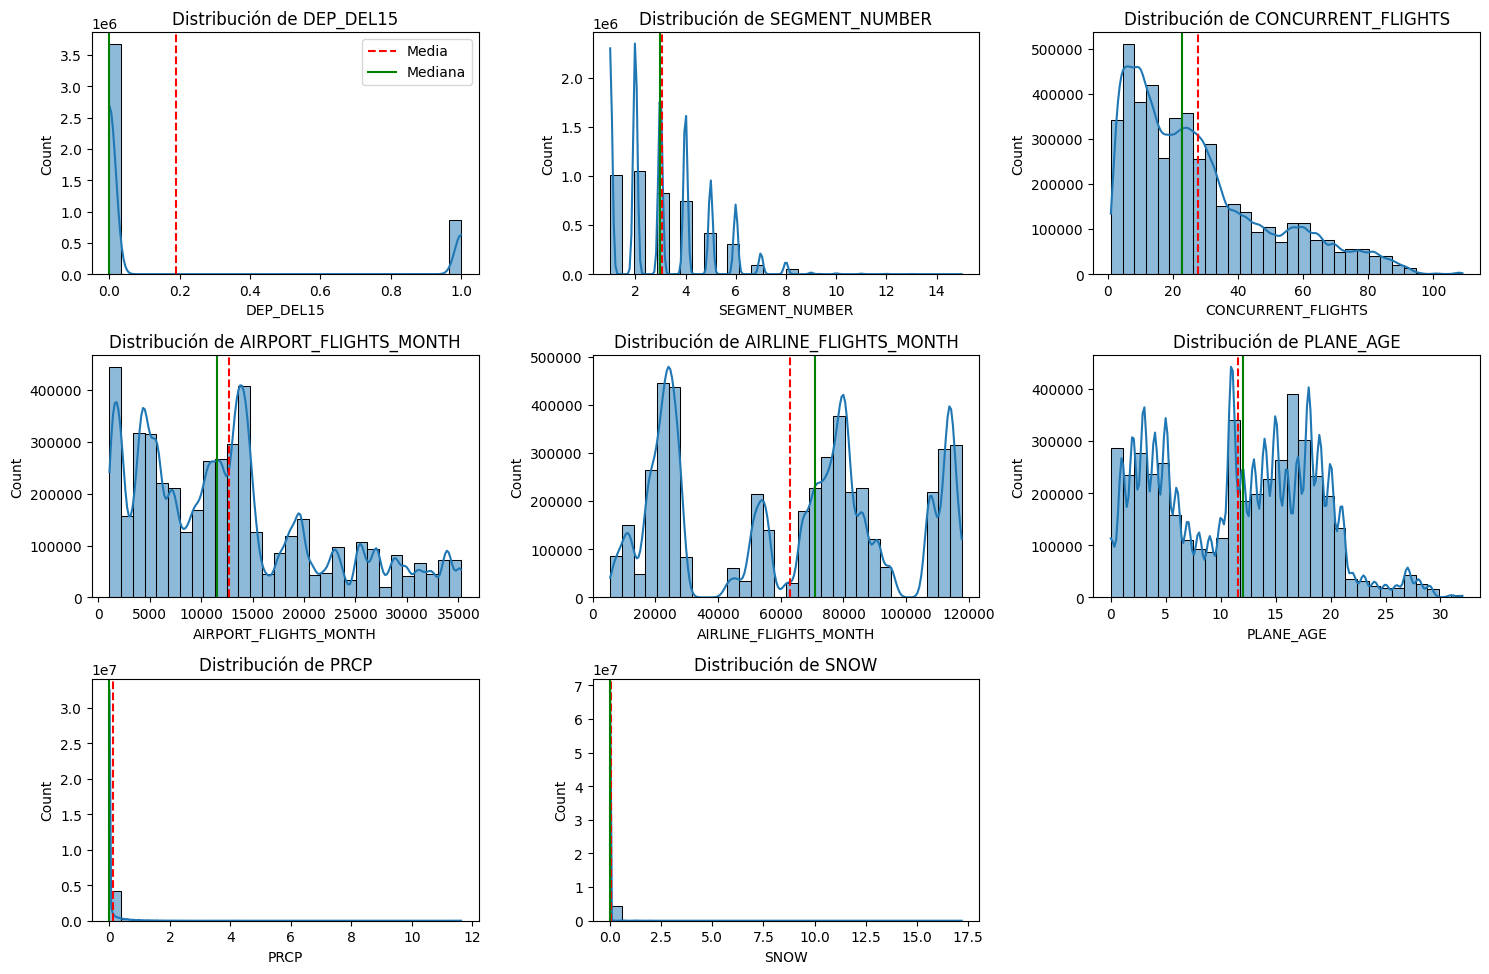

In [20]:
# Análisis de variables numéricas
num_cols = df[['DEP_DEL15','SEGMENT_NUMBER','CONCURRENT_FLIGHTS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH','PLANE_AGE','PRCP','SNOW']]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Media')
    plt.axvline(df[col].median(), color='g', linestyle='-', label='Mediana')
    if i == 1:
        plt.legend()
plt.tight_layout()
plt.show()

####VALORES NULOS

In [21]:
nulls = df.isnull().sum()
print(nulls)

MONTH                                  0
DAY_OF_WEEK                            0
DEP_DEL15                              0
DEP_TIME_BLK                           0
DISTANCE_GROUP                         0
SEGMENT_NUMBER                         0
CONCURRENT_FLIGHTS                     0
NUMBER_OF_SEATS                        0
CARRIER_NAME                           0
AIRPORT_FLIGHTS_MONTH                  0
AIRLINE_FLIGHTS_MONTH                  0
AIRLINE_AIRPORT_FLIGHTS_MONTH          0
AVG_MONTHLY_PASS_AIRPORT               0
AVG_MONTHLY_PASS_AIRLINE               0
FLT_ATTENDANTS_PER_PASS                0
GROUND_SERV_PER_PASS                   0
PLANE_AGE                              0
DEPARTING_AIRPORT                      0
LATITUDE                               0
LONGITUDE                              0
PREVIOUS_AIRPORT                 1014303
PRCP                                   0
SNOW                                   0
SNWD                                   0
TMAX            

Podemos observar que el data set no pose valores nulos, lo que implica que no es necesario realizar tratamiento de estos. Sin embargo, la ausencia de valores NaN no implica que haya valores que se identifiquen como no nulos. Para esto se buscará valores nulos representados por el valor 0 en variables que no deberían serlo. Esto solo en variables númericas.



In [22]:
col = ['MONTH','DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER','CONCURRENT_FLIGHTS','NUMBER_OF_SEATS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH','AVG_MONTHLY_PASS_AIRPORT','AVG_MONTHLY_PASS_AIRLINE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','PLANE_AGE','LATITUDE',
       'LONGITUDE','PRCP','SNOW','TMAX','AWND','CARRIER_HISTORICAL','DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST']

for i in col:
    col_w_zeros = (df[i] == 0).sum()
    if col_w_zeros > 0:
        print(f'La columna {i} tiene {col_w_zeros} registros de valores con cero')

La columna FLT_ATTENDANTS_PER_PASS tiene 489195 registros de valores con cero
La columna PLANE_AGE tiene 84396 registros de valores con cero
La columna PRCP tiene 3189027 registros de valores con cero
La columna SNOW tiene 4428715 registros de valores con cero
La columna TMAX tiene 61 registros de valores con cero
La columna AWND tiene 368 registros de valores con cero


Con esto se observa que solo solo 4 variables tienen valores 0, de los cuales se puede observar, según el glosario es factible que estos valores tengan como valor 0 y no implique que sea un valor nulo.

####VALORES DUPLICADOS

In [23]:
df_duplicados = df.duplicated(keep='last')

In [24]:
df = df.drop_duplicates()
df.shape

(4527988, 41)

En este paso se realizó el tratamiento de valores duplicados, reduciendo más de 14 mil registros duplicados en el dataset.

####OUTLINERS

Para detectar Outliners se deben analizar la variables númericas (float y int) no Booleanas. Para esto, se utilizará el boxplot para poder identificar si dentro de las variables mencionadas encontramos este tipo de valores. Debido a la cantidad de datos que se disponen en el dataset, se analizará en cuatro categorías:

* Línea Aérea
* Aeropuerto
* Climatología
* Fecha

#####OUTLINERS - LINEA AEREA

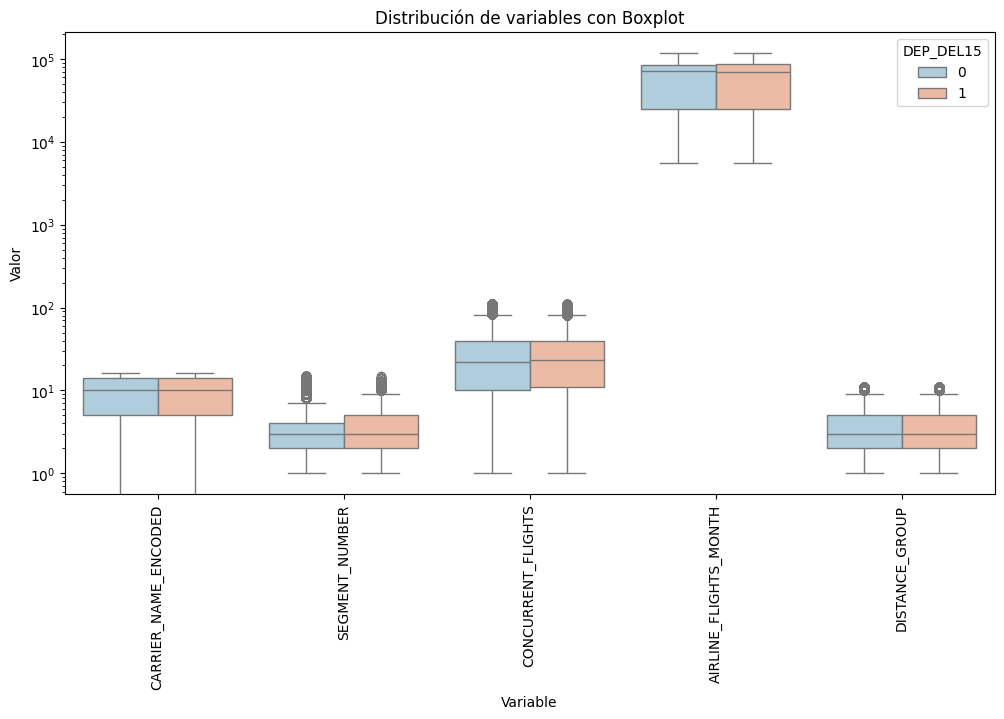

In [25]:
col_airline = ['CARRIER_NAME_ENCODED','SEGMENT_NUMBER','CONCURRENT_FLIGHTS','AIRLINE_FLIGHTS_MONTH','DISTANCE_GROUP'
              ]

bp = df[col_airline+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.yscale("log")  # Usar escala logarítmica si hay valores con grandes diferencias de magnitud
plt.title("Distribución de variables con Boxplot")
plt.show()

#####OUTLINERS - AEROPUERTO

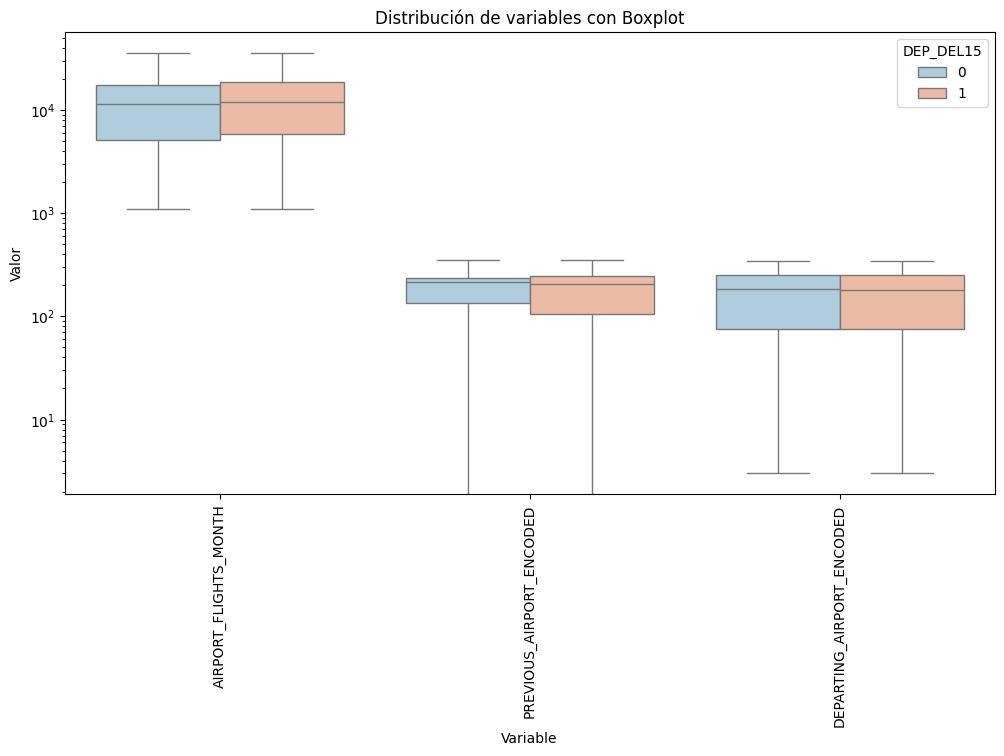

In [26]:
col_airport = ['AIRPORT_FLIGHTS_MONTH','PREVIOUS_AIRPORT_ENCODED','DEPARTING_AIRPORT_ENCODED'
              ]

bp = df[col_airport+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.yscale("log")  # Usar escala logarítmica si hay valores con grandes diferencias de magnitud
plt.title("Distribución de variables con Boxplot")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


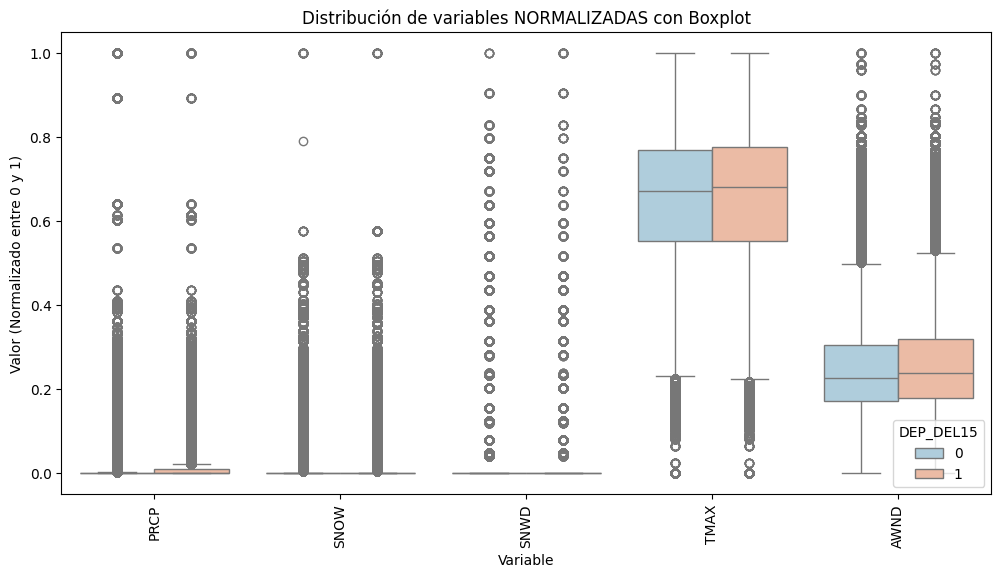

In [27]:
from sklearn.preprocessing import MinMaxScaler


col_weather = ['PRCP','SNOW','SNWD','TMAX','AWND']

# Inicializamos el MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a las columnas de clima y transformamos los datos
df[col_weather] = scaler.fit_transform(df[col_weather])

bp = df[col_weather+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)
plt.title("Distribución de variables NORMALIZADAS con Boxplot")
plt.ylabel("Valor (Normalizado entre 0 y 1)")
plt.show()

#####OUTLINERS - FECHA

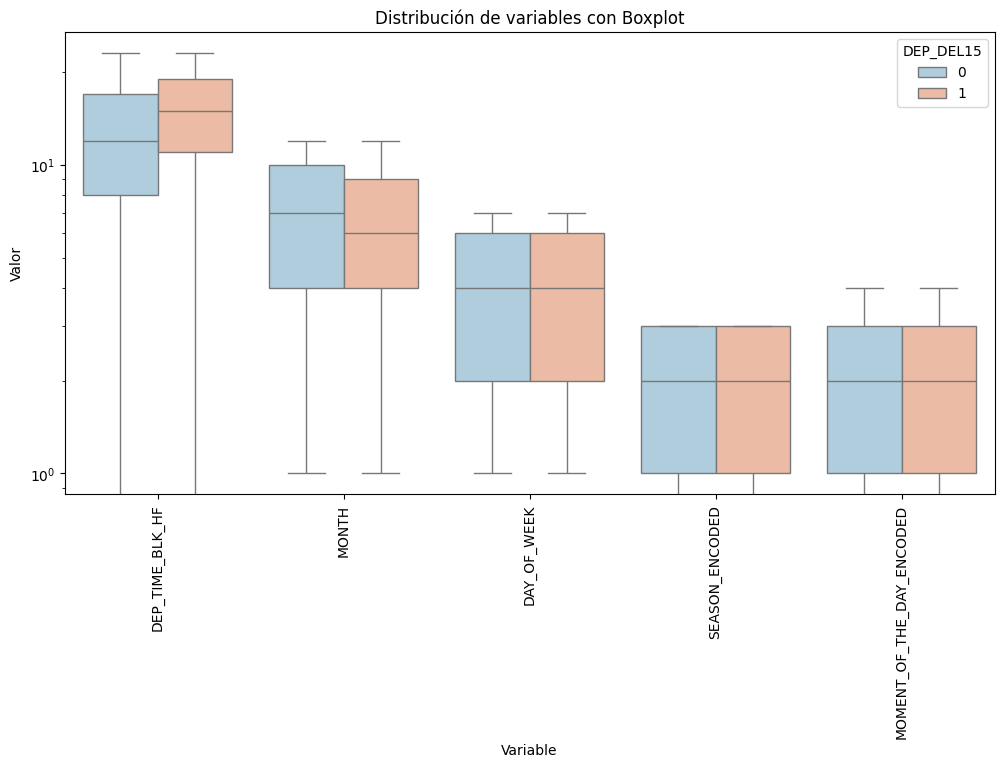

In [28]:
col_date = ['DEP_TIME_BLK_HF','MONTH','DAY_OF_WEEK','SEASON_ENCODED','MOMENT_OF_THE_DAY_ENCODED'
              ]

bp = df[col_date+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Distribución de variables con Boxplot")
plt.show()

Con este análisis se puede observar que outliners no representan grandes variaciones si se catalogan según la variable objetivo, es decir, se puede observar que la cantidad y valores de los outliners detectados son similares en ambas categorías.

Si se puede observar que al analizar ambas categorías los los máximos y mínimos son similares, pero podemos obervar variaciones en los quartiles, esto implica que hay variables que pueden afectar en la variable objetivo.

## ANALISIS EXPLORATORIO DE DATOS


####Análisis - Aeropuertos

In [29]:
airport_counts = df['DEPARTING_AIRPORT'].value_counts().reset_index()
airport_counts.columns = ['DEPARTING_AIRPORT', 'Total']

airport_locations = df.groupby('DEPARTING_AIRPORT').first()[['LATITUDE', 'LONGITUDE']].reset_index()#Nos traemos las ubicaciones de los aeropuertos.

airport_counts_locations = pd.merge(airport_counts, airport_locations, on='DEPARTING_AIRPORT')

#Utilizamos folium para poder realizar el gráfico
m = folium.Map(
    location=[37.09, -95.72],
    zoom_start=5,
    tiles='cartodb positron'
)

# Crear una escala de colores basada en los valores
colormap = linear.RdBu_04.scale(airport_counts_locations['Total'].min(), airport_counts_locations['Total'].max())

# Agregamos cada aeropuerto al mapa
for idx, row in airport_counts_locations.iterrows():
      tooltip_text = f"""
      <h5><b>Location:</b> {row['DEPARTING_AIRPORT']}</h5>
      <h5><b>Magnitude:</b> {row['Total']}</h5>
   """
      color = colormap(row['Total'])  # Determinar el color según la escala

      folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=np.sqrt(row['Total']) / 10,  # Ajusta el radio según sea necesario
        fill=True,
        fill_color=color,
        fill_opacity=0.5,
        weight=1,
        tooltip=folium.Tooltip(tooltip_text, sticky=True),
    ).add_to(m)


# Agregar la barra de colores al mapa
colormap.caption = "Número de salidas por aeropuerto"
colormap.add_to(m)

m.save("airport_map.html") #guardar el mapa en un archivo html

# Mostrar el mapa en Colab
folium.Figure().add_child(m)

<ipython-input-30-6fd6336ae80b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_filtered.groupby(['DEPARTING_AIRPORT', 'MOMENT_OF_THE_DAY']).size().unstack(fill_value=0)


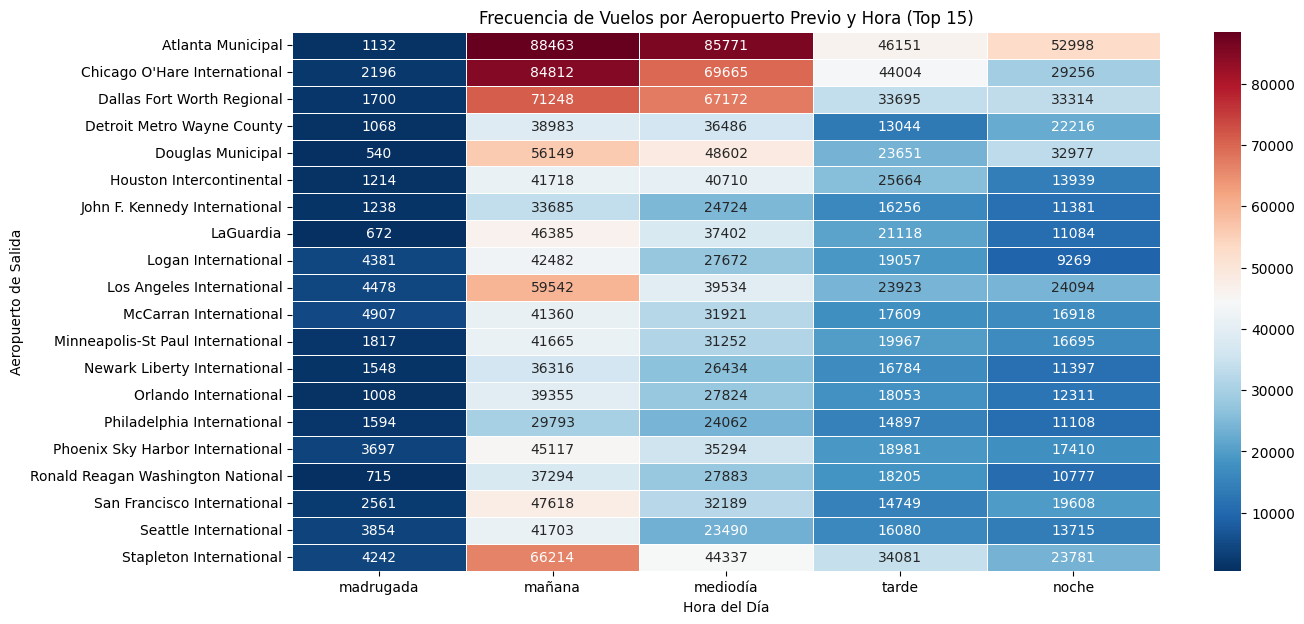

In [30]:
# Obtenemos los 20 aeropuertos con mayores salidas
top_airports = df['DEPARTING_AIRPORT'].value_counts().nlargest(20).index
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Agrupamos y pivoteamos los datos
heatmap_data = df_filtered.groupby(['DEPARTING_AIRPORT', 'MOMENT_OF_THE_DAY']).size().unstack(fill_value=0)

#Gráfico
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="RdBu_r", annot=True, fmt="d", linewidths=0.5)
plt.xlabel('Hora del Día')
plt.ylabel('Aeropuerto de Salida')
plt.title('Frecuencia de Vuelos por Aeropuerto Previo y Hora (Top 15)')

plt.show()

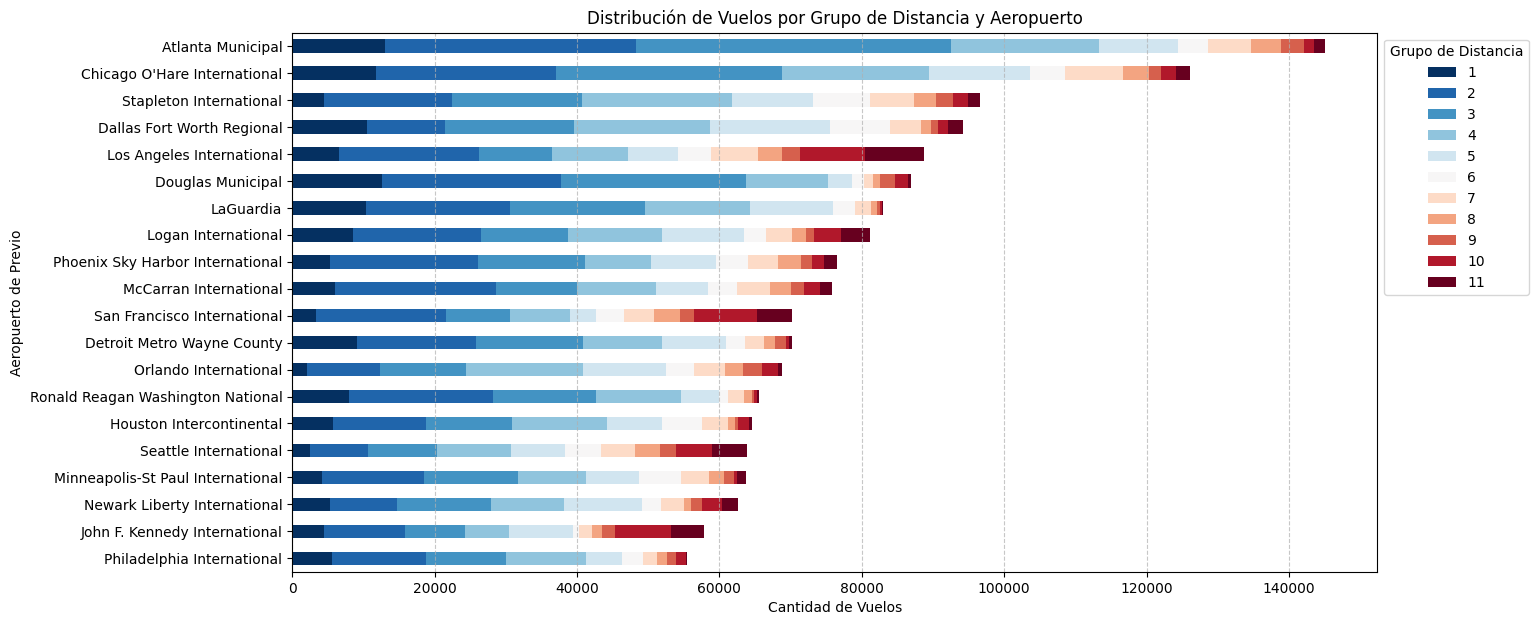

In [31]:
# Obtener los 20 aeropuertos previos más comunes
top_airports = df['PREVIOUS_AIRPORT'].value_counts().nlargest(20).index
df_filtered = df[df['PREVIOUS_AIRPORT'].isin(top_airports)]

# Contamos los vuelos por aeropuerto y grupo de distancia
df_counts = df_filtered.groupby(['PREVIOUS_AIRPORT', 'DISTANCE_GROUP']).size().unstack(fill_value=0)

# Ordenamos los aeropuertos por la suma de vuelos (de mayor a menor)
df_counts = df_counts.loc[df_counts.sum(axis=1).sort_values(ascending=True).index]

#Gráfico
df_counts.plot(kind='barh', stacked=True, colormap="RdBu_r", figsize=(14,7))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel('Aeropuerto de Previo')
plt.xlabel('Cantidad de Vuelos')
plt.title('Distribución de Vuelos por Grupo de Distancia y Aeropuerto')
plt.legend(title="Grupo de Distancia", bbox_to_anchor=(1, 1))

plt.show()

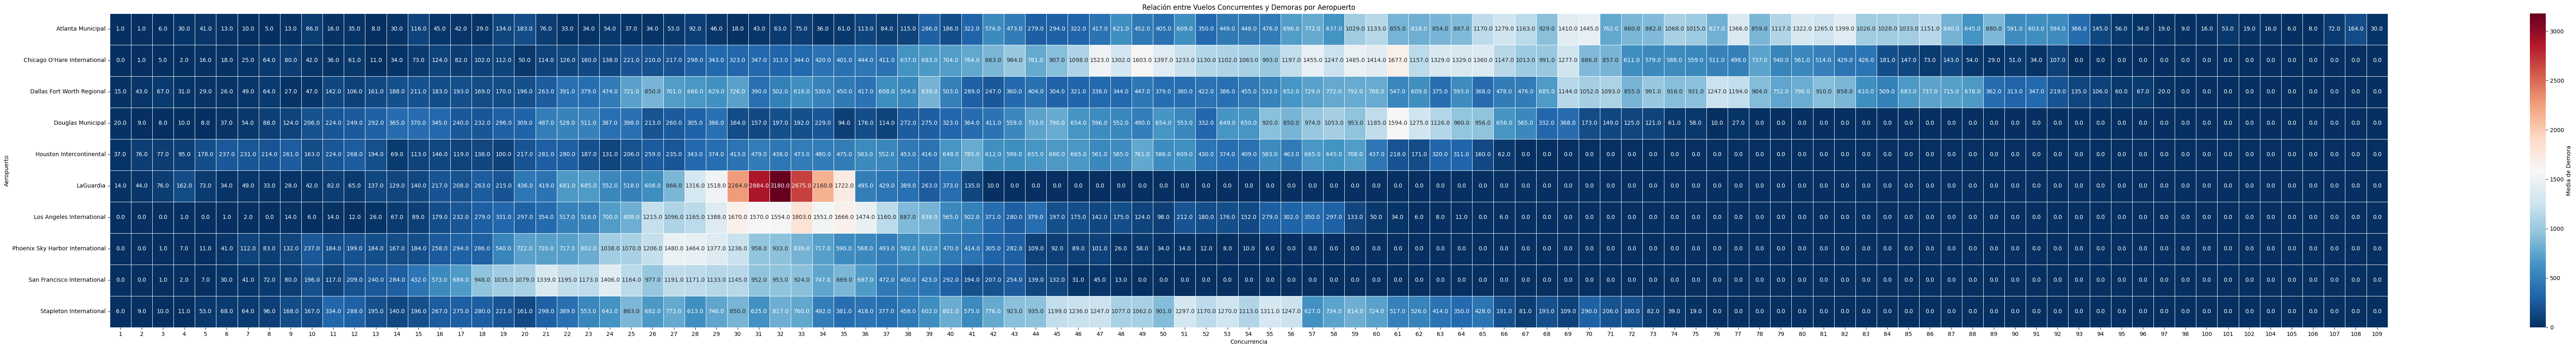

In [32]:
# Filtramos los 10 aeropuertos con más vuelos (por total de vuelos)
top_airports = df['DEPARTING_AIRPORT'].value_counts().nlargest(10).index

# Filtramos el dataframe para que solo contenga los top 10 aeropuertos
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Creamos la tabla de contingencia
df_contingency = df_filtered.pivot_table(values='DEP_DEL15',
                                         index='DEPARTING_AIRPORT',
                                         columns='CONCURRENT_FLIGHTS',
                                         aggfunc='sum',
                                         fill_value=0)

# Grafico
plt.figure(figsize=(90, 10))
sns.heatmap(df_contingency, annot=True, cmap='RdBu_r', fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Media de Demora'})
plt.title('Relación entre Vuelos Concurrentes y Demoras por Aeropuerto')
plt.xlabel('Concurrencia')
plt.ylabel('Aeropuerto')

plt.show()


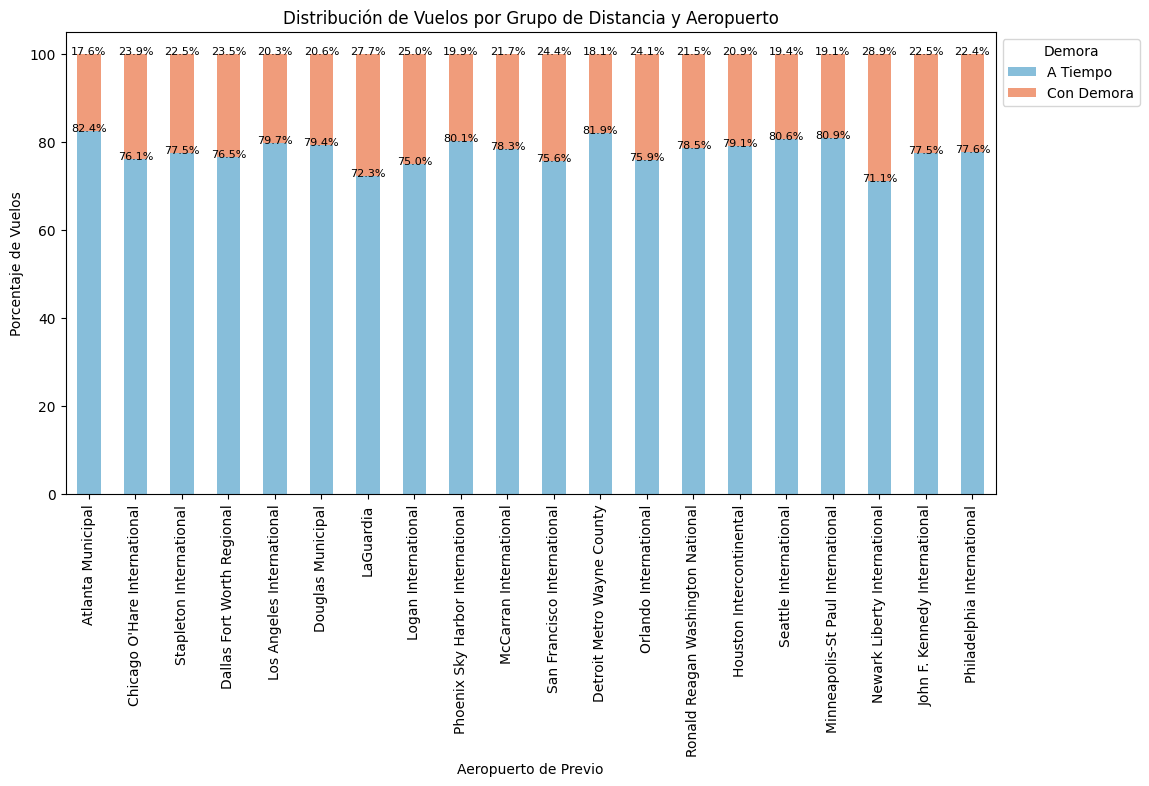

In [33]:
# Obtener los 20 aeropuertos previos más comunes
top_airports = df['PREVIOUS_AIRPORT'].value_counts().nlargest(20).index
df_filtered = df[df['PREVIOUS_AIRPORT'].isin(top_airports)]

# Contamos los aeropuertos en función de las demoras
df_counts = df_filtered.groupby(['PREVIOUS_AIRPORT', 'DEP_DEL15']).size().unstack(fill_value=0)

# Ordenamos los aeropuertos por la suma de vuelos (de mayor a menor)
df_counts = df_counts.loc[df_counts.sum(axis=1).sort_values(ascending=False).index]

# Calculamos el total de vuelos por aeropuerto y el porcentaje de cada categoría
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100  # Convertir a porcentaje

# OUtilizamos la paleta de colores RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

#Gráfico
ax = df_percent.plot(kind='bar', stacked=True, color=[colors[1],colors[4]], figsize=(12,6))

# Agregamos etiquetas con los valores porcentuales en la parte superior de cada barra
for index, row in enumerate(df_percent.itertuples()):
    total_height = 0  # Acumulador de altura
    for i, value in enumerate(row[1:]):  # Omitimos el índice del DataFrame
        if value > 0:  # Evita mostrar etiquetas en valores 0%
            ax.text(index, total_height + value, f"{value:.1f}%",
                    ha='center', fontsize=8, color='black')
        total_height += value  # Acumulamos la altura
plt.xlabel('Aeropuerto de Previo')
plt.ylabel('Porcentaje de Vuelos')
plt.title('Distribución de Vuelos por Grupo de Distancia y Aeropuerto')
plt.legend(title="Demora", labels=["A Tiempo", "Con Demora"], bbox_to_anchor=(1, 1))

plt.show()

**CONCLUSIONES**

1. Con los gráficos podemos observar que el aeropuerto con mayor tránsito de vuelos es el de Atlanta.

2. Además, el este se tiene mayor tránsito que en el oeste, y prácticamente en el centro del país no hay tráfico aéreo.

3. En el oeste se puede observar una mayor concentración en dos puntos siendo esto los aeropuertos de Los Ángeles y de San Francisco.

4. En el este se posee una mayor cantidad de aeropuertos distribuidos a lo largo de la costa atlántica, pero los aeropuertos con mayor flujo se encuentran más oeste de la costa.

5. La cantidad de vuelos operados en franjas horarias, la mayoría de los vuelos salen durante la mañana y el mediodía, mientras que durante la noche y la madrugada la actividad se reduce de manera significativa. (En el gráfico se muestran los 20 aeropuertos con mayor cantidad de salidas).

6. La mayoría de aeropuertos son utilizados para vuelos de corta y media distancia, pero se pueden observar casos como el Aeropuerto de los Angeles, San Francisco y Kennedy donde se observan una mayor presencia de vuelos de larga distancia.

7. Respecto a la demora la media de la misma es menor al 80% para los aeropuertos con mayor cantidad de tráfico. Sin embargo, se puede observar que al aumentar el tráfico la cantidad de demoras es más alta, viendo como ejemplo, el aeropuerto de la Guardia al superar los 19 vuelos concurrentes la cantidad de vuelos demorados acumulados se duplica. Solo con 10 vuelos más la cantidad aumenta por 10.


####Análisis - Lineas Aéreas

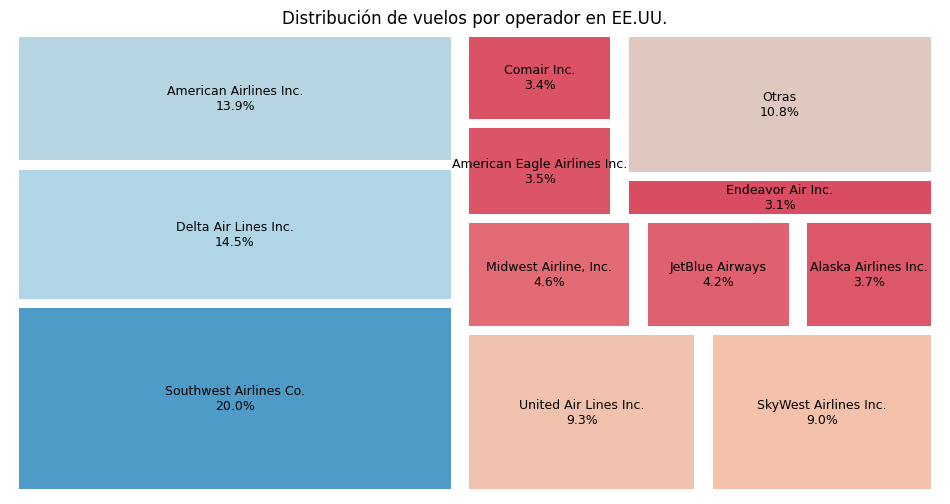

In [34]:
# Obtenemos la cantidad de vuelos por aerolínea
airline_flights = df['CARRIER_NAME'].value_counts().reset_index()
airline_flights.columns = ['Carrier_Name', 'Total']

# Calculamos el total de vuelos y porcentaje de cada aerolínea
total_flights = airline_flights['Total'].sum()
airline_flights['Percentage'] = (airline_flights['Total'] / total_flights) * 100

# Definir el umbral del 3%
threshold = 3

# Separamos aerolíneas principales y las que serán agrupadas en "Otros"
major_airlines = airline_flights[airline_flights['Percentage'] >= threshold]
other_flights = airline_flights[airline_flights['Percentage'] < threshold]['Total'].sum()
other_percentage = (other_flights / total_flights) * 100

# Si hay aerolíneas en "Otros", las agregamos a la tabla como una único, solo para efectos gráficos
if other_flights > 0:
    other_row = pd.DataFrame({'Carrier_Name': ['Otras'], 'Total': [other_flights], 'Percentage': [other_percentage]})
    major_airlines = pd.concat([major_airlines, other_row], ignore_index=True)

# Definir la escala de colores RdBu_04
colormap = linear.RdBu_04.scale(major_airlines['Total'].min(), major_airlines['Total'].max())

# Asignamos los colores según la escala
colors = [colormap(v) for v in major_airlines['Total']]

# Creaamos etiquetas con nombre y porcentaje
labels = [f"{row['Carrier_Name']}\n{row['Percentage']:.1f}%" for _, row in major_airlines.iterrows()]

# Gráfico
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=major_airlines['Total'],
    label=labels,
    color=colors,
    alpha=0.7,
    text_kwargs={'fontsize': 9, 'color': 'Black'},
    pad=True
)

plt.title('Distribución de vuelos por operador en EE.UU.')
plt.axis('off')

plt.show()

<ipython-input-35-eb43822b59fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CARRIER_NAME', y='AVG_MONTHLY_PASS_AIRLINE', palette='RdBu_r')
<ipython-input-35-eb43822b59fd>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Aerolínea', bbox_to_anchor=(1, 1))


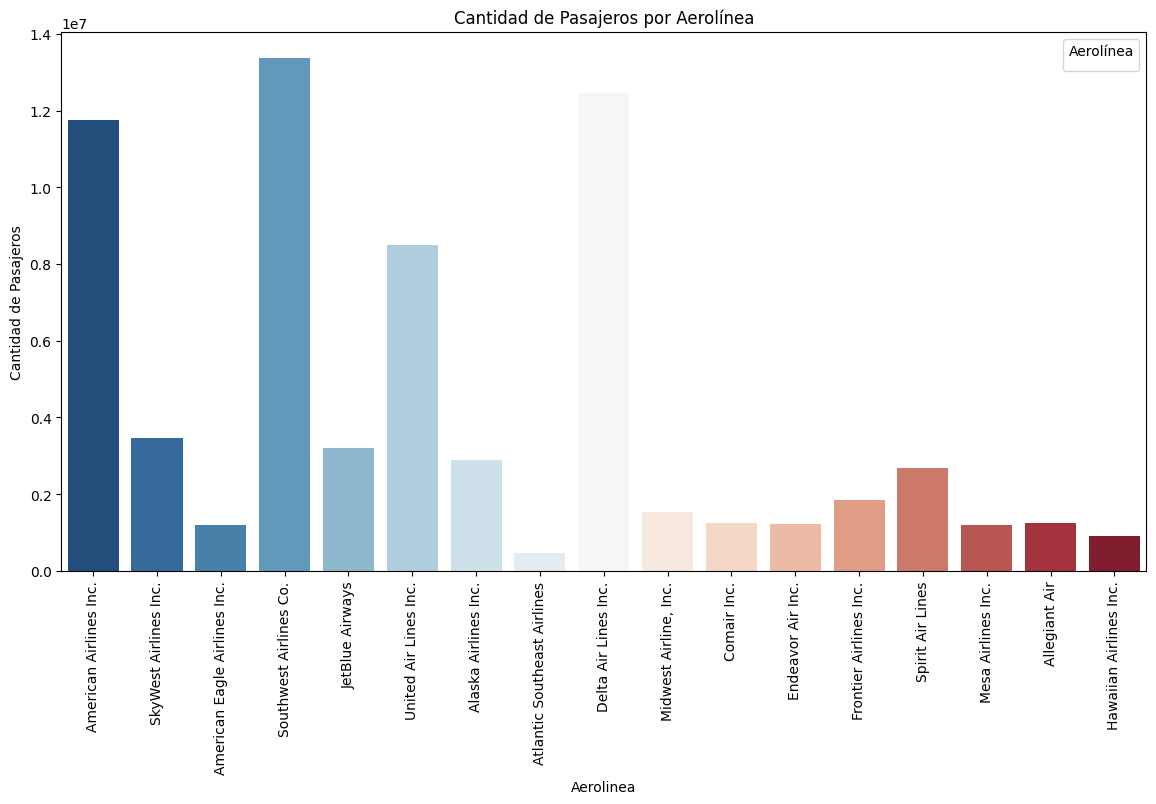

In [35]:
#Gráficamos
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='CARRIER_NAME', y='AVG_MONTHLY_PASS_AIRLINE', palette='RdBu_r')
plt.title('Cantidad de Pasajeros por Aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=90)
plt.legend(title='Aerolínea', bbox_to_anchor=(1, 1))

plt.show()

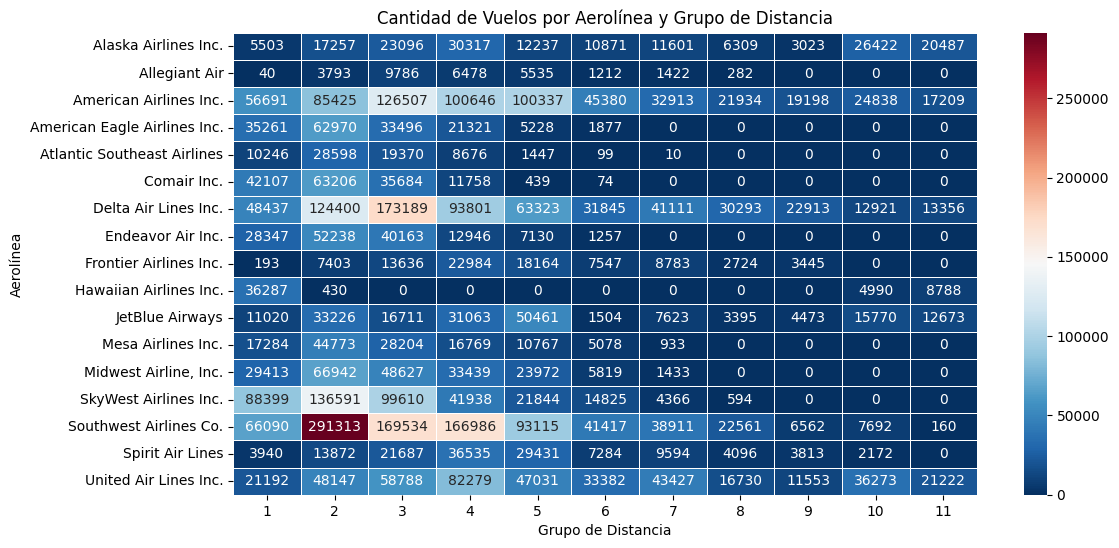

In [36]:
# Contamos la cantidad de vuelos por aerolínea y grupo de distancia
heatmap_data = df.groupby(['CARRIER_NAME', 'DISTANCE_GROUP']).size().unstack(fill_value=0)

# Gráfico
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="RdBu_r", annot=True, fmt="d", linewidths=0.5)
plt.xlabel('Grupo de Distancia')
plt.ylabel('Aerolínea')
plt.title('Cantidad de Vuelos por Aerolínea y Grupo de Distancia')

plt.show()

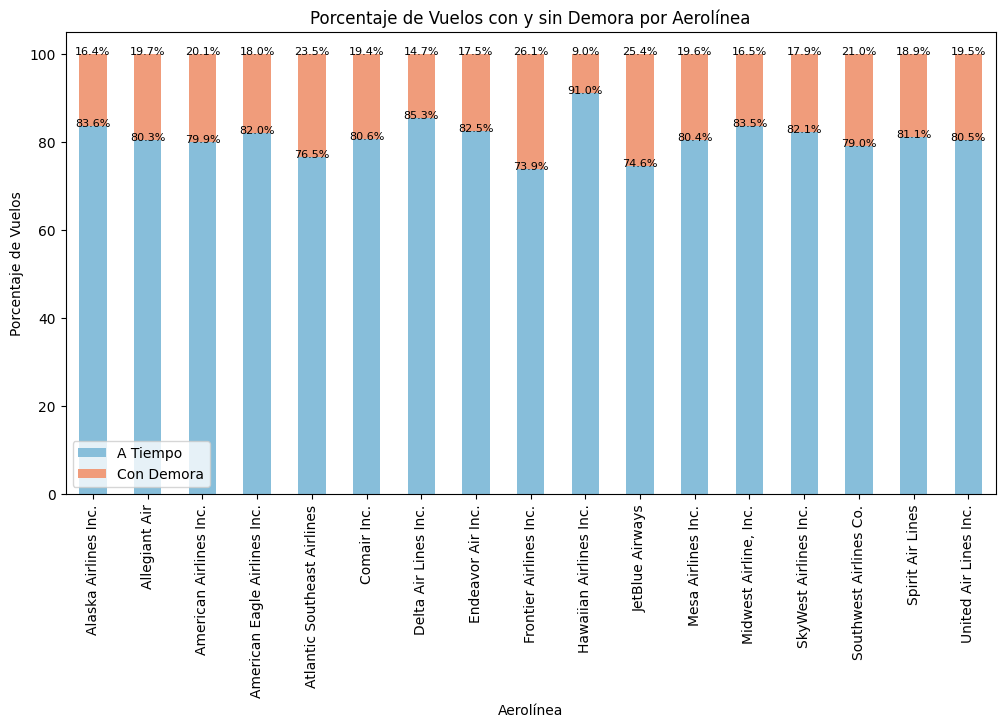

In [37]:
# Contamos vuelos con y sin demora por aerolínea
df_counts = df.groupby(['CARRIER_NAME', 'DEP_DEL15']).size().unstack(fill_value=0)

# Calculamos el total de vuelos por aerolínea y el porcentaje de cada categoría
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100  # Convertir a porcentaje

# Obtenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

#Gráfico
ax = df_percent.plot(kind='bar', stacked=True, color=[colors[1],colors[4]], figsize=(12,6))

# Agregar etiquetas con los valores porcentuales en la parte superior de cada barra
for index, row in enumerate(df_percent.itertuples()):
    total_height = 0  # Acumulador de altura
    for i, value in enumerate(row[1:]):  # Omitimos el índice del DataFrame
        if value > 0:  # Evita mostrar etiquetas en valores 0%
            ax.text(index, total_height + value, f"{value:.1f}%",
                    ha='center', fontsize=8, color='black')
        total_height += value  # Acumulamos la altura

# Configuración del gráfico
plt.ylabel('Porcentaje de Vuelos')
plt.xlabel('Aerolínea')
plt.title('Porcentaje de Vuelos con y sin Demora por Aerolínea')
plt.legend(['A Tiempo', 'Con Demora'])

plt.show()

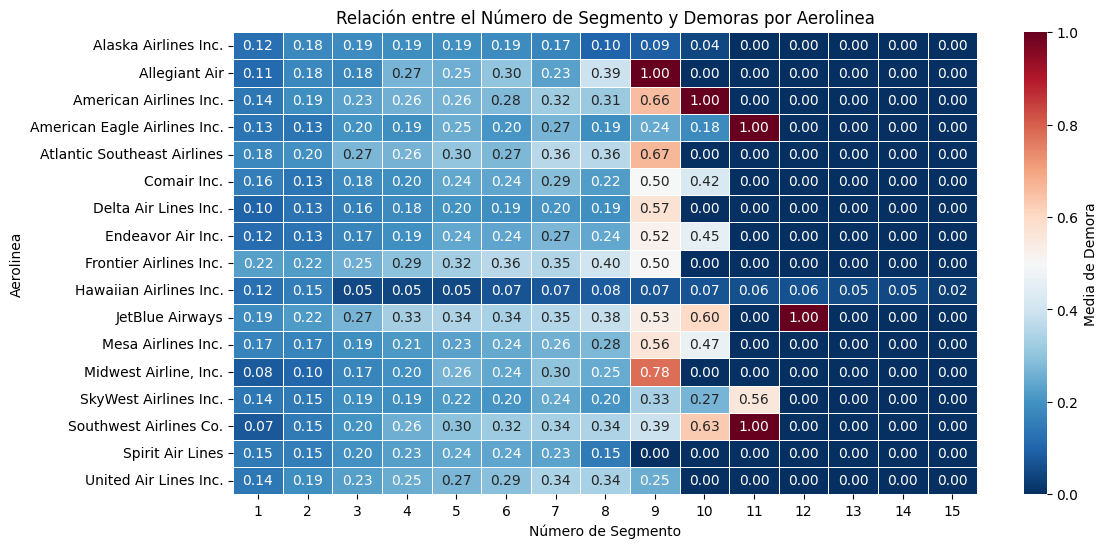

In [38]:
# Creamos la tabla de contingencia
df_contingency = df.pivot_table(values='DEP_DEL15',
                                         index='CARRIER_NAME',
                                         columns='SEGMENT_NUMBER',
                                         aggfunc='mean',
                                         fill_value=0)

# Grafico
plt.figure(figsize=(12, 6))
sns.heatmap(df_contingency, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Media de Demora'})
plt.title('Relación entre el Número de Segmento y Demoras por Aerolinea')
plt.xlabel('Número de Segmento')
plt.ylabel('Aerolinea')

plt.show()

**CONCLUSIÓN**

1. Se puede observar con el primer gráfico de la izquierda que más del 60% de la operación se encuentra concentrada en 5 aerolíneas principalmente, siendo que 3 aerolíneas controlan casi el 50% del mercado aerocomercial.

2. La puntualidad que ofrece la oferta es del 80% de media. Siendo la línea aérea más puntual es Hawaiian Airlines, mientras que la línea aérea con la menor puntualidad es Frontier Airlines, seguida por JetBlue Airways.

3. En relación con las líneas aéreas con mayor participación en el mercado ofrecen una media del 81% de puntualidad, siendo Delta Airlines, mientras que Southwest es la aerolínea es la que menor puntualidad ofrece.

4. La distancia recorrida en las rutas que ofrece cada una de las aerolíneas, se puede ver que la mayoría de las compañías operan en vuelos de corta y mediana distancia.

5. A su vez, se oberva que las líneas aéreas clásicas (American Airlines, Delta Airlines y United) son las que mayor cantidad de vuelos de larga distancia.

6. Se observa que la posibilidad de sufrir una demora aumenta con el número de segmento, es decir, a apartir del segmento 9 la mayoría de vuelos tuvieron demora.

####Análisis - Climatología

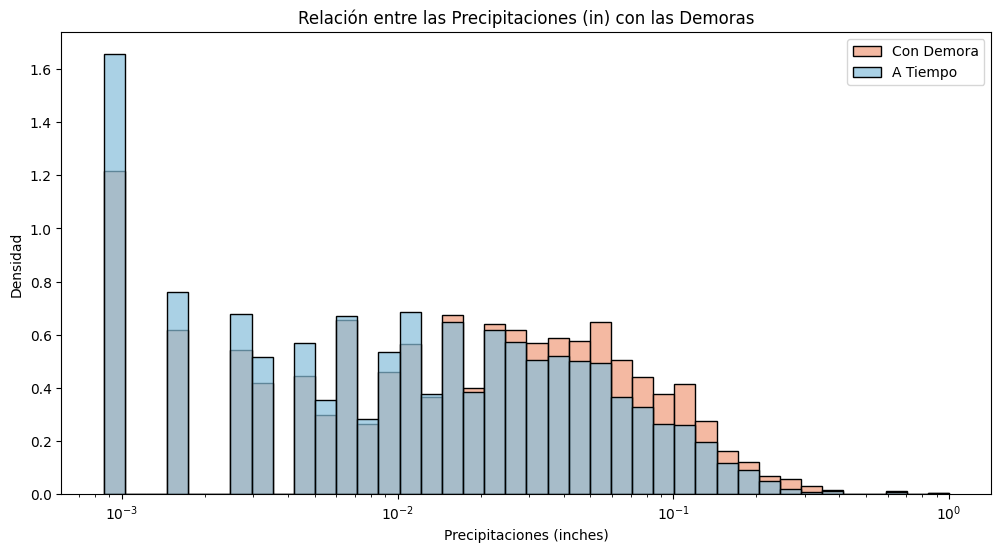

In [39]:
# Filtramos los vuelos con y sin demora
df_delayed = df[df['DEP_DEL15'] == 1]
df_not_delayed = df[df['DEP_DEL15'] == 0]

# Obtenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

plt.figure(figsize=(12, 6))

# Graficamos el histograma para los vuelos con demora
sns.histplot(df_delayed['PRCP'], color=colors[4], label='Con Demora', stat="density", bins=40, alpha=0.7, log_scale=True)

# Graficamos el histograma para los vuelos sin demora
sns.histplot(df_not_delayed['PRCP'], color=colors[1], label='A Tiempo', stat="density", bins=40, alpha=0.7, log_scale=True)

plt.title('Relación entre las Precipitaciones (in) con las Demoras')
plt.xlabel('Precipitaciones (inches)')
plt.ylabel('Densidad')
plt.legend()

plt.show()

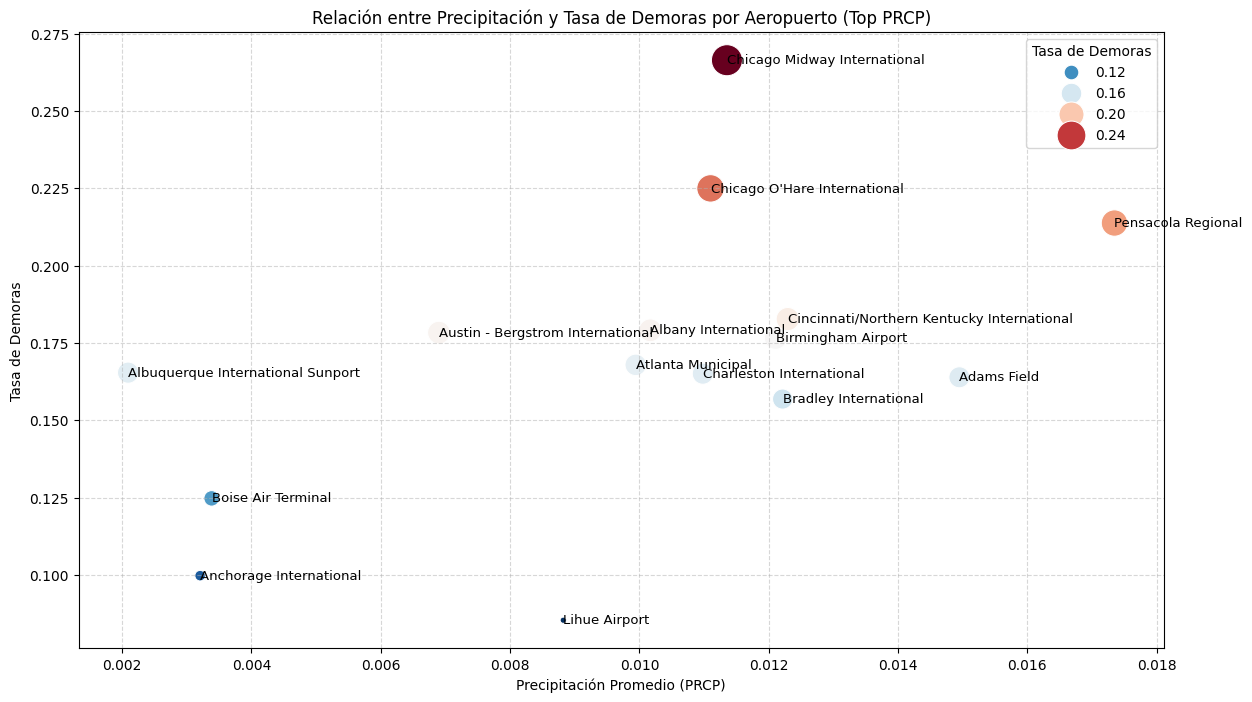

In [40]:
# Calculamos la mediana de PRCP por aeropuerto y seleccionar los 15 con mayor PRCP
top_airports = df.groupby('DEPARTING_AIRPORT')['PRCP'].median().nlargest(15).index

# Filtramow solo estos aeropuertos
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Calculamow la tasa de demora por aeropuerto
df_delay_rate = df_filtered.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].mean().reset_index()
df_delay_rate.rename(columns={'DEP_DEL15': 'Delay_Rate'}, inplace=True)

# Calculamow el PRCP promedio por aeropuertocfiltrados
df_weather = df_filtered.groupby('DEPARTING_AIRPORT')[['PRCP']].mean().reset_index()

# Unimos los datasets
df_final = df_delay_rate.merge(df_weather, on='DEPARTING_AIRPORT')

# Graficamos
plt.figure(figsize=(14,8))
scatter = sns.scatterplot(data=df_final, x='PRCP', y='Delay_Rate', size='Delay_Rate', hue='Delay_Rate', palette="RdBu_r", sizes=(20, 500))

# Agregar etiquetas con los nombres de los aeropuertos
for i in range(df_final.shape[0]):
    plt.text(x=df_final['PRCP'][i], y=df_final['Delay_Rate'][i], s=df_final['DEPARTING_AIRPORT'][i],
             fontsize=9.5, ha='left',va='center')

plt.title('Relación entre Precipitación y Tasa de Demoras por Aeropuerto (Top PRCP)')
plt.xlabel('Precipitación Promedio (PRCP)')
plt.ylabel('Tasa de Demoras')
plt.legend(title="Tasa de Demoras")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

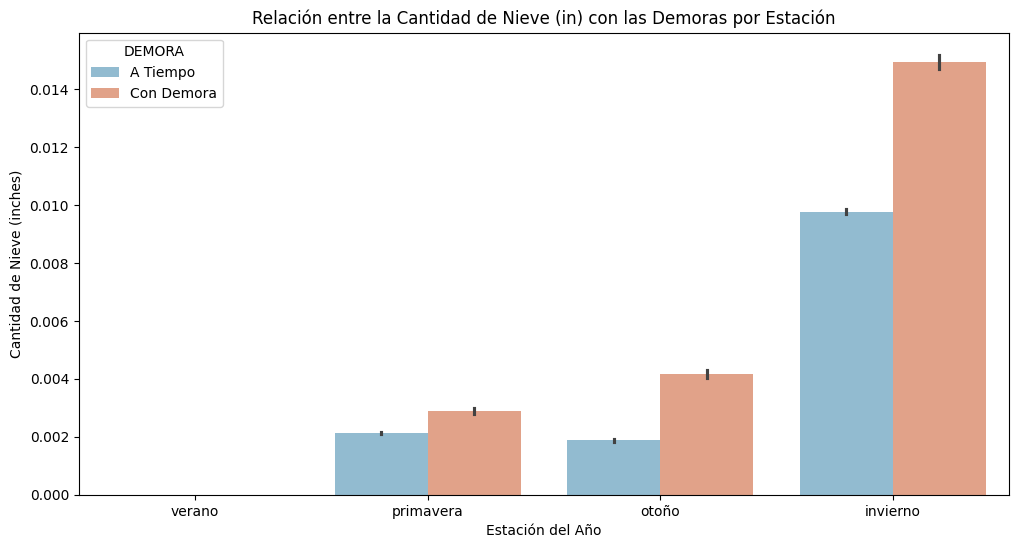

In [41]:
# Filtramos vuelos con y sin demora
df_delayed = df[df['DEP_DEL15'] == 1]
df_not_delayed = df[df['DEP_DEL15'] == 0]

# Creaamos un mapeo para los valores de DEP_DEL15
df['DEMORA'] = df['DEP_DEL15'].map({1: 'Con Demora', 0: 'A Tiempo'})

# Obtenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

# Gráficamos
plt.figure(figsize=(12, 6))
sns.barplot(y = df['SNWD'], x = df['SEASON'], hue = df['DEMORA'], palette=[colors[1],colors[4]])
plt.title('Relación entre la Cantidad de Nieve (in) con las Demoras por Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Nieve (inches)')


# Mostrar el gráfico
plt.show()

<ipython-input-42-f30fe344bf5c>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = season_flights[index]  # Total de vuelos operados en esa estación


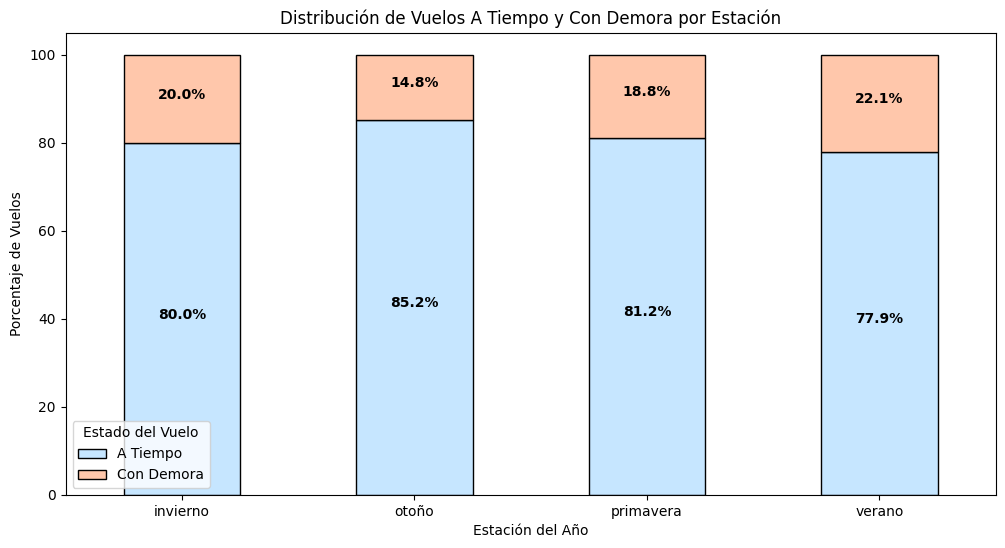

In [42]:
# Calcular la cantidad total de vuelos por estación
season_flights = df['SEASON'].value_counts().sort_index()

# Calcular la cantidad de vuelos demorados por estación
season_delayed_flights = df[df['DEP_DEL15'] == 1]['SEASON'].value_counts().sort_index()

# Calcular la cantidad de vuelos sin demora por estación
season_on_time_flights = season_flights - season_delayed_flights

# Crear DataFrame con los resultados
df_plot = pd.DataFrame({
    'A Tiempo': season_on_time_flights,
    'Con Demora': season_delayed_flights
}).fillna(0)

# Calcular los porcentajes
df_percentage = df_plot.div(season_flights, axis=0) * 100

# Crear gráfico de barras apiladas
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(12, 6),
                        color=["#c6e6ff", "#ffc7ab"], edgecolor='black')

# Configuración del gráfico
plt.title('Distribución de Vuelos A Tiempo y Con Demora por Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Porcentaje de Vuelos')
plt.xticks(rotation=0)
plt.legend(title="Estado del Vuelo")

# Mostrar los porcentajes y las cantidades dentro de las barras
for index, (on_time, delayed) in enumerate(zip(df_percentage["A Tiempo"], df_percentage["Con Demora"])):
    total = season_flights[index]  # Total de vuelos operados en esa estación
    # Mostrar los porcentajes dentro de las barras
    plt.text(index, on_time / 2, f"{on_time:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')
    plt.text(index, on_time + delayed / 2, f"{delayed:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Mostrar el gráfico
plt.show()

**Conslusiones**

1. Se observa que la lluvia tiene un impacto en la demora de los vuelos, siendo visible que a mayor cantidad de presipitaciones la posibilidad de que un vuelo se demoré es mayor.

2. Durante la mayoría de las estaciones del año, la nieve tiene un impacto en las demoras, siendo evidente que cuando se superan los 0.05 mm de nieve en pista la probabilidad de demora aumenta en las estaciones de primavera y otoño.

3. En invierno, para que se produzca una demora se puede ver que incluso con valores 5 veces mayor al mencionado en el punto anterior, puede que no se porduzcan demoras.

4. En el verano, no existen registros de nieve en el dataset. Sin emabargo, es el mes en donde se producen mayores demoras.



<ipython-input-43-531af75e09e0>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


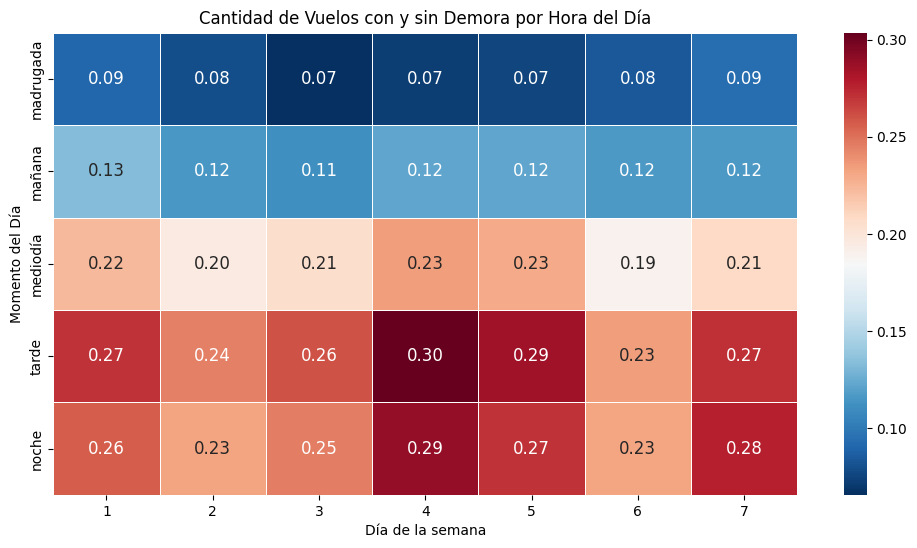

In [43]:
heatmap_data = pd.pivot_table(
    df,
    values='DEP_DEL15',
    index='MOMENT_OF_THE_DAY',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)


# Obtenenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

# Graficamos
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdBu_r', cbar=True, linewidths=0.5, annot_kws={"size": 12})
plt.ylabel('Momento del Día')
plt.xlabel('Día de la semana')
plt.title('Cantidad de Vuelos con y sin Demora por Hora del Día')

plt.show()

<ipython-input-44-bef19436cb4f>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


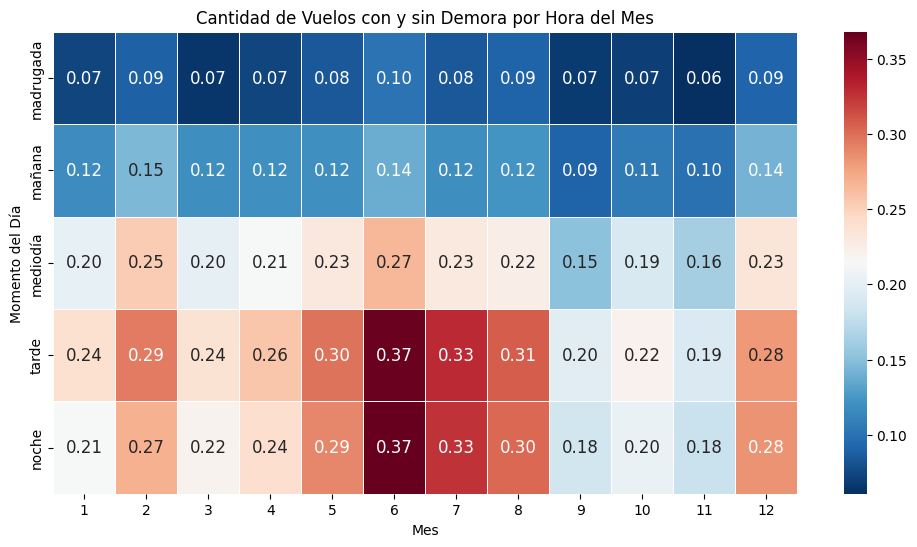

In [44]:
heatmap_data = pd.pivot_table(
    df,
    values='DEP_DEL15',
    index='MOMENT_OF_THE_DAY',
    columns='MONTH',
    aggfunc='mean'
)


# Obtenenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

# Graficamos
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdBu_r', cbar=True, linewidths=0.5, annot_kws={"size": 12})
plt.ylabel('Momento del Día')
plt.xlabel('Mes')
plt.title('Cantidad de Vuelos con y sin Demora por Hora del Mes')

plt.show()

### CONCLUSIONES DEL EDA

Con este análisis pudimos ver que no existe una relación directa entre la variable objetivo y alguna de las variables. Sin embargo, si podemos encontrar relaciones entre varias variables y la variable objetivo, es decir, la predicción de nuestra variable objetivo se deberá a una combinación de variables, que en un principio no tenían una relación directa, pero luego con la exploratoria pudimos encontrar algunos patrones, por ejemplo, la hora del día y la cantidad de demoras registradas.

Esto será muy útil a partir de ahora, ya que poder entender como se relacionan estas variables permitirán desarrollar el modelo.

## MACHINE LEARNING

Al ser un problema de categorización en donde se debe determinar si un vuelo se demora o no, se van a utilizar modelos que se basen en el uso de técnicas que permitar determinar esta categorización, los modelos que se utilizarán son:

*   Regresión Logística
*   KNN
*   Random Forest
*   XGBoost

Tomando en cuenta el análisis realizado en el EDA, tomaremos como variables independendientes.

### SELECCIÓN DE VARIABLES

Previo al inicio del entrenamiento, se limpia el dataset para trabajar con una dimensión menor y reducir el trabajo del modelo.

In [45]:
df_original = df #Alcamenamos el dataset original en uno de b-up

df = df.drop('MONTH', axis= 1) #Eliminamos la columna MONTH ya que fue reemplazada por Season
df = df.drop('DEP_TIME_BLK', axis= 1) #Eliminamos la columna DEP_TIME_BLK ya que fue reemplazada por _HF
df = df.drop('DEP_TIME_BLK_HF', axis= 1) #Eliminamos la columna DEP_TIME_BLK_FH ya que fue reemplazada por MOMENT_OF_THE_DAY
df = df.drop('PRCP', axis= 1) #Eliminamos la columna PRCP ya que fue reemplazada por PRCP_CAT
df = df.drop('SNOW', axis= 1) #Eliminamos la columna SNOW ya que fue reemplazada por SNOW_CAT
df = df.drop('SNWD', axis= 1) #Eliminamos la columna SNWD ya que fue reemplazada por SNWD_CAT
df = df.drop('LATITUDE', axis= 1) #Eliminamos la columna LATITUDE ya que no se incluye en el modelo
df = df.drop('LONGITUDE', axis= 1) #Eliminamos la columna LOGITUDE ya que no se incluye en el modelo
df = df.drop('TMAX', axis= 1) #Eliminamos la columna LOGITUDE ya que no se incluye en el modelo
df = df.drop('AWND', axis= 1) #Eliminamos la columna LOGITUDE ya que no se incluye en el modelo
df = df.drop('CARRIER_NAME', axis= 1) #Eliminamos la columna CARRIER_NAME ya que fue reemplazada por CARRIER_NAME_ENCODED
df = df.drop('MOMENT_OF_THE_DAY', axis= 1) #Eliminamos la columna MOMENT_OF_THE_DAY ya que fue reemplazada por MOMENT_OF_THE_DAY_ENCODED
df = df.drop('SEASON', axis= 1) #Eliminamos la columna SEASON ya que fue reemplazada por SEASON_ENCODED

df.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,DEP_BLOCK_HIST,PREVIOUS_AIRPORT_ENCODED,DEPARTING_AIRPORT_ENCODED,CARRIER_NAME_ENCODED,MOMENT_OF_THE_DAY_ENCODED,SEASON_ENCODED,PRCP_CAT,SNOW_CAT,SNWD_CAT,DEMORA
0,7,0,3,3,26,160,19534,79247,7972,2006675,...,0.255479,56,80,2,2,3,0,0,0,A Tiempo
1,1,0,4,4,63,50,18788,67082,3655,2743323,...,0.197503,87,311,13,2,2,0,0,0,A Tiempo
2,4,0,2,1,3,76,1148,25517,300,90547,...,0.060327,216,3,3,0,1,0,0,0,A Tiempo
3,2,0,7,5,14,143,7612,114119,3282,1023434,...,0.202037,286,284,14,2,2,0,0,0,A Tiempo
4,3,0,1,2,85,50,29376,28267,6058,3103410,...,0.113050,59,56,3,1,3,1,0,0,A Tiempo


A su vez, como contamos con un dataset con una gran cantidad de datos, se utiliza el siguiente código para poder mantener la proporción de valor 0 y 1 en DEP_DEL15 para no sesgar al modelo.

In [46]:
# Definimos la función que busca que tomar una cantidad de datos proporcionales de datos con DEP_DEL15.
def proportional_sample(df, col, n_total_samples, random_state=42):
    proportions = df[col].value_counts(normalize=True)
    sampled_df = []
    for value, prop in proportions.items():
        n_samples = int(round(n_total_samples * prop))
        class_df = df[df[col] == value].sample(n=n_samples, random_state=random_state)
        sampled_df.append(class_df)
    return pd.concat(sampled_df)

# Especifica el tamaño total de la muestra que deseas
total_samples = 50000

df_sample = proportional_sample(df, 'DEP_DEL15', total_samples)

print(f"Tamaño del dataset original: {len(df)}")
print(f"Tamaño del dataset muestreado proporcionalmente: {len(df_sample)}")
print("\nDistribución de la variable objetivo en el dataset original:")
print(df['DEP_DEL15'].value_counts(normalize=True))
print("\nDistribución de la variable objetivo en el dataset muestreado proporcionalmente:")
print(df_sample['DEP_DEL15'].value_counts(normalize=True))

Tamaño del dataset original: 4527988
Tamaño del dataset muestreado proporcionalmente: 50000

Distribución de la variable objetivo en el dataset original:
DEP_DEL15
0    0.810364
1    0.189636
Name: proportion, dtype: float64

Distribución de la variable objetivo en el dataset muestreado proporcionalmente:
DEP_DEL15
0    0.81036
1    0.18964
Name: proportion, dtype: float64


Ahora utilizaremos los métodos de:

* Pearson
* Spearman
* Anova
* Chi-Cuadrado

Para determinar cuales son las mejores variables para el modelo.

--- Correlación de Pearson con la variable objetivo ---
DEP_BLOCK_HIST                   0.196459
MOMENT_OF_THE_DAY_ENCODED        0.151551
CARRIER_HISTORICAL               0.121202
SEGMENT_NUMBER                   0.110295
DEP_AIRPORT_HIST                 0.106162
DAY_HISTORICAL                   0.101859
PRCP_CAT                         0.086503
SNOW_CAT                         0.059614
SNWD_CAT                         0.034218
AIRPORT_FLIGHTS_MONTH            0.033024
AVG_MONTHLY_PASS_AIRPORT         0.030244
SEASON_ENCODED                   0.026317
CARRIER_NAME_ENCODED             0.019763
DEPARTING_AIRPORT_ENCODED       -0.017847
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.016398
CONCURRENT_FLIGHTS               0.016367
PREVIOUS_AIRPORT_ENCODED        -0.014289
NUMBER_OF_SEATS                  0.012557
DISTANCE_GROUP                   0.011919
GROUND_SERV_PER_PASS            -0.008411
PLANE_AGE                        0.007294
DAY_OF_WEEK                     -0.006253
FLT_ATTENDANTS_PER_P

<ipython-input-47-9bb8da155ecc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_pearson.index, y=correlations_pearson.values, palette="viridis")


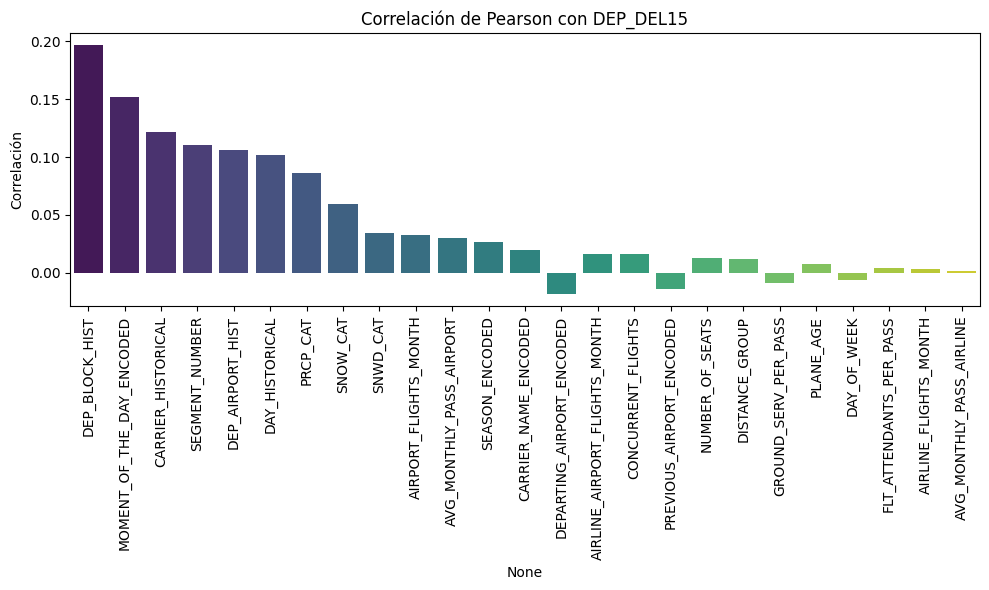


--- Correlación de Spearman con la variable objetivo ---
DEP_BLOCK_HIST                   0.194371
MOMENT_OF_THE_DAY_ENCODED        0.159760
CARRIER_HISTORICAL               0.119634
SEGMENT_NUMBER                   0.117286
DAY_HISTORICAL                   0.101696
DEP_AIRPORT_HIST                 0.094793
PRCP_CAT                         0.086503
SNOW_CAT                         0.059614
AVG_MONTHLY_PASS_AIRPORT         0.038568
AIRPORT_FLIGHTS_MONTH            0.038396
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.036110
SNWD_CAT                         0.034218
SEASON_ENCODED                   0.027390
CONCURRENT_FLIGHTS               0.020373
CARRIER_NAME_ENCODED             0.020163
DEPARTING_AIRPORT_ENCODED       -0.018151
DISTANCE_GROUP                   0.016649
PREVIOUS_AIRPORT_ENCODED        -0.011188
NUMBER_OF_SEATS                  0.009007
PLANE_AGE                        0.008437
GROUND_SERV_PER_PASS            -0.007138
DAY_OF_WEEK                     -0.006222
FLT_ATTENDANTS_PER

<ipython-input-47-9bb8da155ecc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_spearman.index, y=correlations_spearman.values, palette="magma")


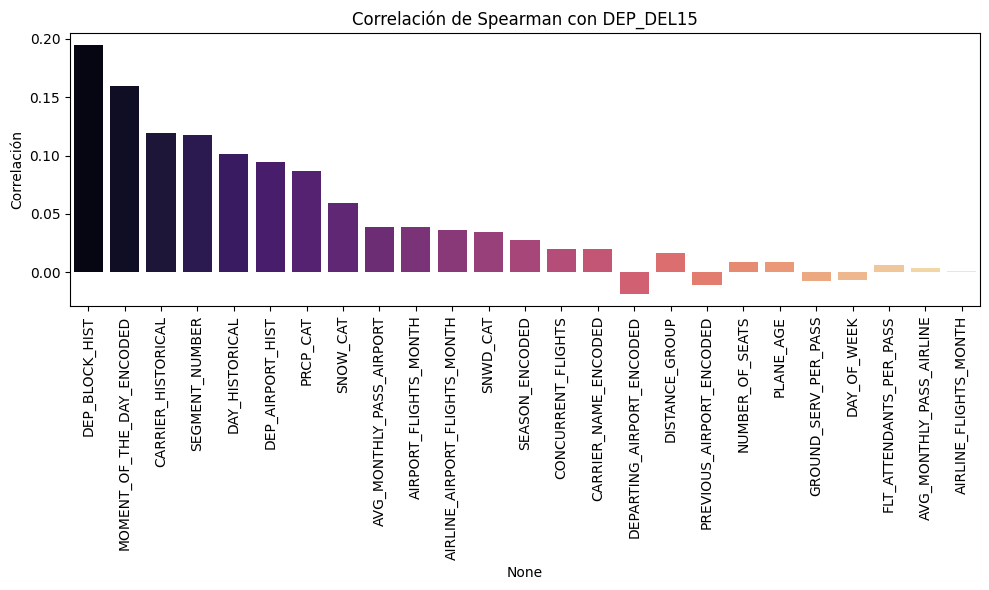


--- ANOVA (para variables numéricas vs variable objetivo) ---
DEP_BLOCK_HIST                    0.000000e+00
MOMENT_OF_THE_DAY_ENCODED        1.276763e-254
CARRIER_HISTORICAL               6.272059e-163
SEGMENT_NUMBER                   4.207360e-135
DEP_AIRPORT_HIST                 2.953785e-125
DAY_HISTORICAL                   2.050229e-115
PRCP_CAT                          1.172479e-83
SNOW_CAT                          1.326244e-40
SNWD_CAT                          1.955569e-14
AIRPORT_FLIGHTS_MONTH             1.509448e-13
AVG_MONTHLY_PASS_AIRPORT          1.340138e-11
SEASON_ENCODED                    3.968690e-09
CARRIER_NAME_ENCODED              9.895142e-06
DEPARTING_AIRPORT_ENCODED         6.583332e-05
AIRLINE_AIRPORT_FLIGHTS_MONTH     2.456549e-04
CONCURRENT_FLIGHTS                2.523205e-04
PREVIOUS_AIRPORT_ENCODED          1.397005e-03
NUMBER_OF_SEATS                   4.987458e-03
DISTANCE_GROUP                    7.694734e-03
GROUND_SERV_PER_PASS              6.000899e-

<ipython-input-47-9bb8da155ecc>:42: RuntimeWarning: divide by zero encountered in log10
  sns.barplot(x=anova_series.index, y=-np.log10(anova_series.values), palette="cividis") # -log10(p_value) para visualizar significancia
<ipython-input-47-9bb8da155ecc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anova_series.index, y=-np.log10(anova_series.values), palette="cividis") # -log10(p_value) para visualizar significancia


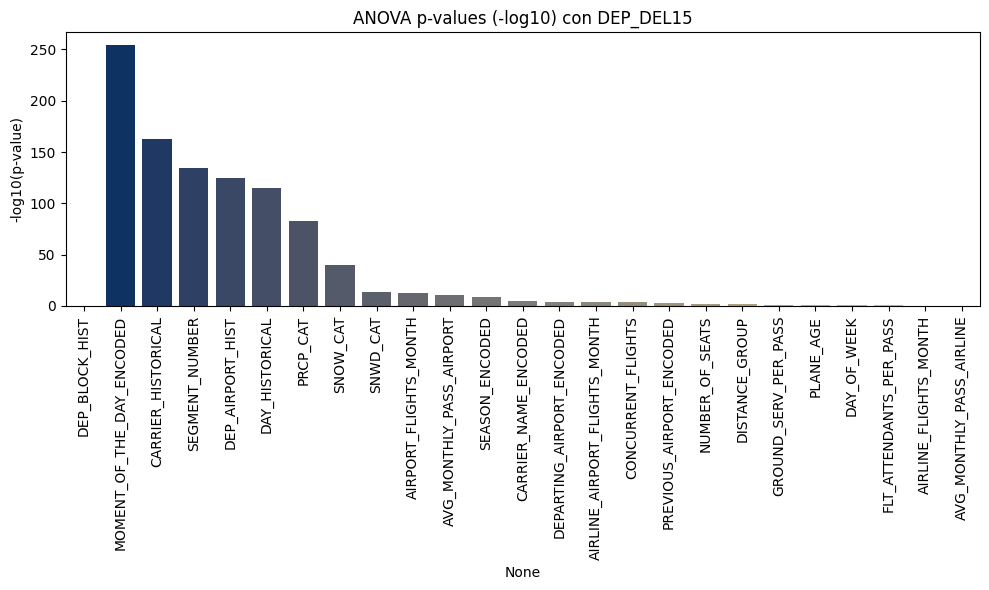


Valores más altos en el gráfico de ANOVA indican una mayor significancia en la diferencia de medias entre grupos.

--- Prueba Chi-cuadrado (para variables categóricas vs variable objetivo) ---
MOMENT_OF_THE_DAY_ENCODED    1.592162e-287
PREVIOUS_AIRPORT_ENCODED      2.324124e-65
SEASON_ENCODED                8.414785e-61
CARRIER_NAME_ENCODED          2.012702e-52
DEPARTING_AIRPORT_ENCODED     1.763547e-46
dtype: float64


<ipython-input-47-9bb8da155ecc>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_series.index, y=-np.log10(chi2_series.values), palette="plasma") # -log10(p_value)


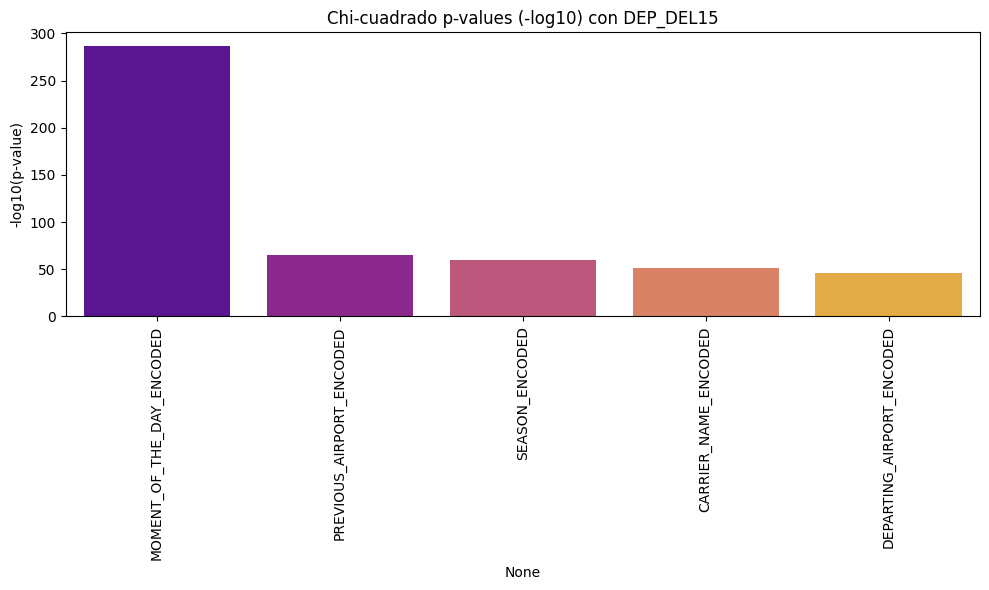


Valores más altos en el gráfico de Chi-cuadrado indican una mayor dependencia entre las variables.


In [47]:
from scipy.stats import spearmanr, f_oneway, chi2_contingency

df_num = df_sample.select_dtypes(include=['number']) #Seleccionamos solo las variables numéricas del modelo

# Separamos las características (X) y la variable objetivo (y)
X = df_num.drop(columns=['DEP_DEL15'])
y = df_num['DEP_DEL15']

print("--- Correlación de Pearson con la variable objetivo ---")
correlations_pearson = X.corrwith(y).sort_values(key=abs, ascending=False)
print(correlations_pearson)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_pearson.index, y=correlations_pearson.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Correlación de Pearson con DEP_DEL15")
plt.ylabel("Correlación")
plt.tight_layout()
plt.show()

print("\n--- Correlación de Spearman con la variable objetivo ---")
correlations_spearman = pd.Series([spearmanr(X[col], y).correlation for col in X.columns], index=X.columns).sort_values(key=abs, ascending=False)
print(correlations_spearman)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_spearman.index, y=correlations_spearman.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Correlación de Spearman con DEP_DEL15")
plt.ylabel("Correlación")
plt.tight_layout()
plt.show()

print("\n--- ANOVA (para variables numéricas vs variable objetivo) ---")
anova_results = {}
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        groups = X[col].groupby(y)
        if len(groups) >= 2:
            f_statistic, p_value = f_oneway(*[group.values for name, group in groups])
            anova_results[col] = p_value
anova_series = pd.Series(anova_results).sort_values()
print(anova_series)
plt.figure(figsize=(10, 6))
sns.barplot(x=anova_series.index, y=-np.log10(anova_series.values), palette="cividis") # -log10(p_value) para visualizar significancia
plt.xticks(rotation=90)
plt.title("ANOVA p-values (-log10) con DEP_DEL15")
plt.ylabel("-log10(p-value)")
plt.tight_layout()
plt.show()
print("\nValores más altos en el gráfico de ANOVA indican una mayor significancia en la diferencia de medias entre grupos.")

print("\n--- Prueba Chi-cuadrado (para variables categóricas vs variable objetivo) ---")
chi2_results = {}
categorical_cols = ['PREVIOUS_AIRPORT_ENCODED', 'DEPARTING_AIRPORT_ENCODED', 'CARRIER_NAME_ENCODED', 'SEASON_ENCODED', 'MOMENT_OF_THE_DAY_ENCODED'] # Ajusta esta lista
X_categorical = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

if not X_categorical.empty:
    p_values = []
    cols = []
    for col in X_categorical.columns:
        observed = pd.crosstab(X_categorical[col], y)
        if observed.shape[1] > 1 and observed.shape[0] > 1:
            chi2_stat, p_value, dof, expected = chi2_contingency(observed) # Usamos chi2_contingency
            p_values.append(p_value)
            cols.append(col)
    chi2_series = pd.Series(p_values, index=cols).sort_values()
    print(chi2_series)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=chi2_series.index, y=-np.log10(chi2_series.values), palette="plasma") # -log10(p_value)
    plt.xticks(rotation=90)
    plt.title("Chi-cuadrado p-values (-log10) con DEP_DEL15")
    plt.ylabel("-log10(p-value)")
    plt.tight_layout()
    plt.show()
    print("\nValores más altos en el gráfico de Chi-cuadrado indican una mayor dependencia entre las variables.")
else:
    print("No se encontraron columnas categóricas para la prueba Chi-cuadrado.")

Tomando en cuenta que al ser un modelo que no tiene correlaciones altas de las variables con la variable a predecir DEP_DEL15, se tomaran aquellas que tienen una gran importancia en los diferentes métodos utilizados, los cuales son:

* MOMENT_OF_THE_DAY_ENCODED
* PREVIOUS_AIRPORT_ENCODED
* SEGMENT_NUMBER
* DEPARTING_AIRPORT_ENCODED
* SEASON_ENCODED
* PRCP_CAT
* SNOW_CAT

In [48]:
X = df_sample[['SEGMENT_NUMBER','PREVIOUS_AIRPORT_ENCODED','DEPARTING_AIRPORT_ENCODED',
               'MOMENT_OF_THE_DAY_ENCODED','CARRIER_NAME_ENCODED','PRCP_CAT','SNOW_CAT']]

La variable a predecir es:

In [49]:
y = df_sample['DEP_DEL15']

Se importan las librerias de uso recurrente en el modelo de entrenamiento

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from IPython.display import HTML

Se utilizq StandarScaler para poder tener equilibradas los datos de entrada al modelo, y se realiza la división del dataset para el entrenamiento y test para los modelos a utilizar.

In [51]:
# Se preprocesan los datos con Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Se divide en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Para el reporte de los modelos se define la siguiente función:

In [52]:
def reporte (y_test, y_pred):
  # Matriz de Confusión como DataFrame
  conf_matrix = confusion_matrix(y_test, y_pred)
  conf_df = pd.DataFrame(conf_matrix,
                      index=['Actual 0', 'Actual 1'],
                      columns=['Predicted 0', 'Predicted 1'])

  print("Confusion Matrix:")
  print(conf_df)

  # Classification Report como DataFrame
  report = classification_report(y_test, y_pred, output_dict=True)
  report_df = pd.DataFrame(report).transpose()

  print("\nClassification Report:")
  print(report_df)

  # Se visualiza la matriz de confusión
  conf_matrix = confusion_matrix(y_test, y_pred)
  color = sns.color_palette("icefire", as_cmap=True)
  class_names = y.unique() # Obtener los nombres de las clases únicas de y
  sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap=color, fmt='.2%',
            xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Prediction')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix for Logistic Regression')
  plt.show()

### REGRESIÓN LOGÍSTICA

La regresión logística nos permite predecir el resultado de una variable categórica en función de las variables independientes o predictoras.


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        12163           18
Actual 1         2807           12

Classification Report:
              precision    recall  f1-score       support
0              0.812492  0.998522  0.895952  12181.000000
1              0.400000  0.004257  0.008424   2819.000000
accuracy       0.811667  0.811667  0.811667      0.811667
macro avg      0.606246  0.501390  0.452188  15000.000000
weighted avg   0.734971  0.811667  0.729156  15000.000000


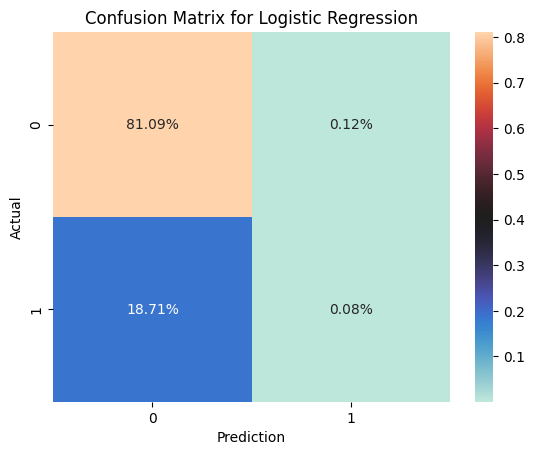

In [53]:
from sklearn.linear_model import LogisticRegression

# Se inicializa y entrena el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Se realizan las predicciones
y_pred = model.predict(X_test)

reporte(y_test,y_pred)

Este modelo de regresión logística muestra un desempeño muy desigual entre las dos clases. Si bien logra una alta precisión general (81.2%) y un muy buen desempeño al predecir correctamente la clase 0 (no positiva), su capacidad para identificar la clase 1 (positiva) es muy baja.

La clase 0 se predice con alta exactitud y casi sin errores, lo que se refleja en una precisión del 81%, recall del 99.8% y f1-score alto (0.896).

La clase 1, en cambio, apenas es detectada: de 2.819 casos, solo 12 fueron correctamente clasificados, resultando en un recall de solo 0.4% y un f1-score prácticamente nulo (0.008).

Esto indica que el modelo está fuertemente sesgado hacia la clase mayoritaria, y no es útil para detectar casos positivos.

La métrica de "accuracy" (81%) es engañosa en este contexto, ya que está influenciada por el desbalance entre clases. Las métricas promedio (macro y weighted) también reflejan esta disparidad, mostrando valores mucho más bajos en f1-score.

En resumen, el modelo no logra generalizar adecuadamente para ambas clases y requiere ajustes, especialmente en lo referente al tratamiento del desbalance de clases.

Mejores hiperparámetros encontrados: {'C': np.float64(1e-05), 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        11354          827
Actual 1         2413          406

Classification Report:
              precision    recall  f1-score    support
0              0.824726  0.932107  0.875135  12181.000
1              0.329278  0.144023  0.200395   2819.000
accuracy       0.784000  0.784000  0.784000      0.784
macro avg      0.577002  0.538065  0.537765  15000.000
weighted avg   0.731615  0.784000  0.748329  15000.000


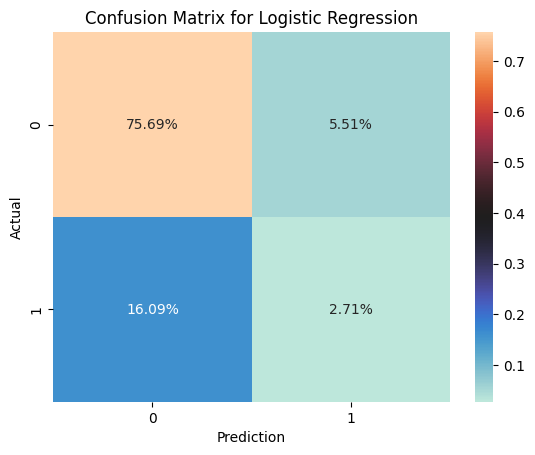

In [54]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Se configura la regularización del modelo y se realiza la validación cruzada:
c_values = np.logspace(-5, 5, 20)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Se definen los hiperparámetros del modelo
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
    {'C': c_values, 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    {'C': c_values, 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
    {'C': c_values, 'penalty': [None], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# Se buscan los mejores hiperparámetros para el modelo
model = LogisticRegression(random_state=42, max_iter=1000,class_weight={0: 1, 1: 2})
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Se realizan las predicciones
y_pred = best_model.predict(X_test)

reporte(y_test,y_pred)

Tras la mejora, el desempeño del modelo de regresión logística presenta un avance significativo en la detección de la clase minoritaria (clase 1), aunque aún se evidencian limitaciones importantes.

La clase 0 mantiene un buen rendimiento, con un recall del 93.2% y un f1-score de 0.875, lo que indica que el modelo sigue siendo eficaz para identificar correctamente los casos negativos.

La clase 1 muestra una mejoría notable respecto al modelo anterior, pasando de prácticamente no ser detectada (recall 0.4%) a un recall del 14.4% y un f1-score de 0.20. Si bien los valores siguen siendo bajos, reflejan que el modelo ahora es al menos parcialmente capaz de identificar algunos casos positivos.

En términos generales:

* La precisión general (accuracy) se reduce levemente a 78.4%, lo cual es esperable al aumentar la sensibilidad hacia la clase minoritaria.

* Las métricas promedio (macro y weighted) también mejoran respecto al modelo anterior, reflejando un mayor balance entre clases.

En resumen, el modelo ahora realiza un mejor compromiso entre sensibilidad y precisión, particularmente al mejorar la detección de la clase 1. No obstante, su rendimiento sigue siendo limitado en esa clase, por lo que aún podrían explorarse estrategias adicionales, como técnicas de muestreo, ajuste de umbrales o modelos más complejos.

### KNN

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        10961         1220
Actual 1         2391          428

Classification Report:
              precision    recall  f1-score       support
0              0.820926  0.899844  0.858575  12181.000000
1              0.259709  0.151827  0.191627   2819.000000
accuracy       0.759267  0.759267  0.759267      0.759267
macro avg      0.540317  0.525835  0.525101  15000.000000
weighted avg   0.715454  0.759267  0.733233  15000.000000


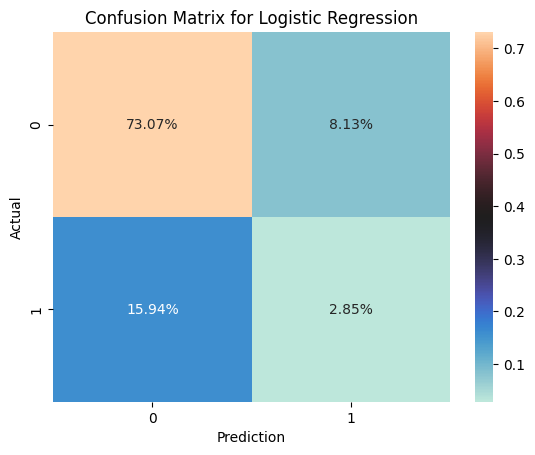

In [55]:
from sklearn.neighbors import KNeighborsClassifier

#Se inicializa el entrenamiento con un total de 3 vecinos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Se realizan las predicciones
y_pred = knn.predict(X_test)

reporte(y_test,y_pred)

Este primer modelo de KNN mantiene un buen desempeño para la clase 0, con un recall del 89.9% y un f1-score de 0.86, aunque presenta un incremento en los falsos positivos respecto a modelos anteriores.

La clase 1 es detectada parcialmente, con un recall del 15.2% y un f1-score de 0.19, valores similares al modelo de regresión logística mejorado, pero con una precisión más baja (26%).

La precisión general (75.9%) se reduce ligeramente, y las métricas promedio siguen reflejando el desbalance entre clases.

En resumen, KNN logra resultados comparables pero algo inferiores a la regresión logística mejorada, especialmente en términos de balance entre precisión y sensibilidad hacia la clase minoritaria.

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Mejores hiperparámetros encontrados: {'algorithm': 'brute', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        10743         1438
Actual 1         2324          495

Classification Report:
              precision    recall  f1-score     support
0              0.822147  0.881947  0.850998  12181.0000
1              0.256079  0.175594  0.208333   2819.0000
accuracy       0.749200  0.749200  0.749200      0.7492
macro avg      0.539113  0.528771  0.529666  15000.0000
weighted avg   0.715764  0.749200  0.730220  15000.0000


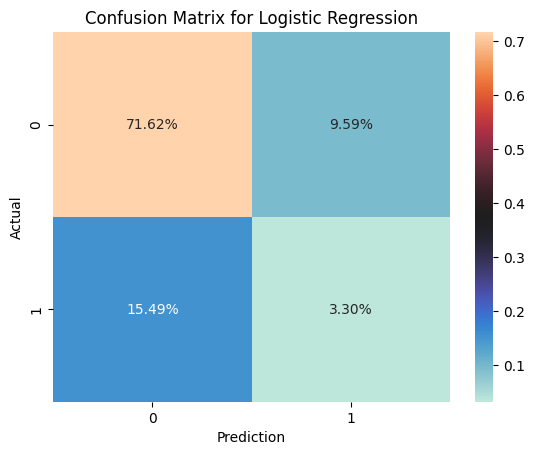

In [56]:
# Se define el modelo KNN (sin especificar n_neighbors inicialmente)
knn = KNeighborsClassifier()

# Se definen la validación cruzada para el modelo
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Se definen los hiperparámetros del modelo
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Diferentes valores para el número de vecinos
    'weights': ['uniform', 'distance'],  # Función de peso de los vecinos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo para calcular los vecinos
    'p': [1, 2]  # 1 para distancia Manhattan, 2 para distancia Euclídea
}

# Se configura el GridSearch
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

# Se ajusta el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:", best_params)

# Se realizan las predicciones
y_pred = best_knn.predict(X_test)

reporte(y_test,y_pred)

Tras la mejora, el modelo KNN muestra un ligero avance en la detección de la clase 1, con un recall del 17.6% y un f1-score de 0.21, aunque la precisión se mantiene baja (25.6%).

La clase 0 conserva un buen desempeño, con un recall del 88.2% y un f1-score de 0.85, aunque con una leve caída respecto a la versión anterior.

La precisión general (74.9%) se mantiene estable, y las métricas promedio indican una mejora marginal en el balance entre clases.

En resumen, el modelo mejora ligeramente en sensibilidad hacia la clase minoritaria, manteniendo un rendimiento aceptable en la clase mayoritaria, aunque sigue mostrando limitaciones para una detección efectiva de la clase 1.

### RANDOM FOREST

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        11151         1030
Actual 1         2409          410

Classification Report:
              precision    recall  f1-score       support
0              0.822345  0.915442  0.866400  12181.000000
1              0.284722  0.145442  0.192533   2819.000000
accuracy       0.770733  0.770733  0.770733      0.770733
macro avg      0.553534  0.530442  0.529467  15000.000000
weighted avg   0.721308  0.770733  0.739758  15000.000000


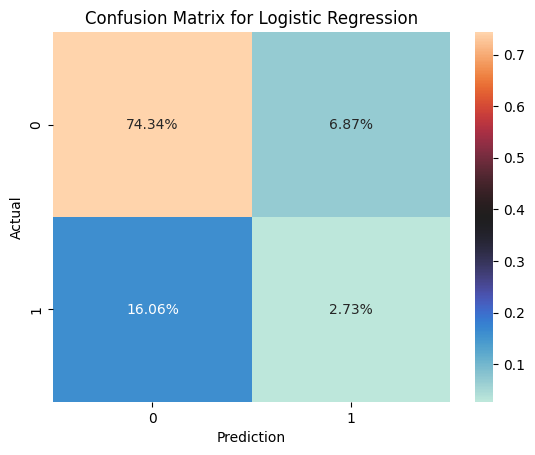

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Se entrena el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Se realiza la predicción
y_pred = model.predict(X_test)

reporte(y_test,y_pred)

En su primera aproximación, el modelo Random Forest muestra un buen desempeño en la clase 0, con un recall del 91.5% y un f1-score de 0.87, lo que indica una alta capacidad para identificar correctamente los casos negativos.

La clase 1 es detectada de forma limitada, con un recall del 14.5% y un f1-score de 0.19, cifras similares a las obtenidas con otros modelos en etapas iniciales.

La precisión general (77.1%) es competitiva, y las métricas promedio reflejan el mismo patrón observado anteriormente: buen rendimiento en la clase mayoritaria y dificultades con la clase minoritaria.

En resumen, Random Forest ofrece un rendimiento equilibrado dentro de los modelos explorados, con una sólida clasificación de la clase 0 y un nivel de detección de la clase 1 comparable al resto de los modelos en sus primeras versiones.

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         7851         4330
Actual 1         1170         1649

Classification Report:
              precision    recall  f1-score       support
0              0.870303  0.644528  0.740591  12181.000000
1              0.275799  0.584959  0.374858   2819.000000
accuracy       0.633333  0.633333  0.633333      0.633333
macro avg      0.573051  0.614744  0.557724  15000.000000
weighted avg   0.758576  0.633333  0.671857  15000.000000


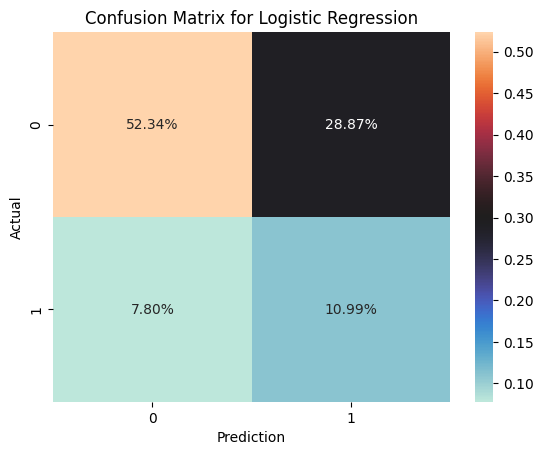

In [58]:
# Se define un espacio de hiperparámetros
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1, 3],
    'class_weight': ['balanced',{0:1,1:2}]
}

# Utiliza StratifiedKFold para la validación cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Menos folds para acelerar

# Inicializa el modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Realiza la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                                 param_grid=param_grid,
                                 cv=cv,
                                 scoring='f1',
                                 n_jobs=-1,
                                 verbose=1)

grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el mejor modelo en el conjunto de prueba
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

reporte(y_test,y_pred)

Tras el ajuste de hiperparámetros, el modelo Random Forest muestra un cambio significativo en el comportamiento del clasificador, priorizando la detección de la clase minoritaria.

* La clase 1 presenta una mejora considerable, con un recall del 58.5% y un f1-score de 0.37, lo que indica que el modelo ahora logra identificar una mayor proporción de los casos positivos.

* La clase 0, en contraste, sufre una caída en el desempeño, con un recall de 64.5% y un f1-score de 0.74, reflejando un aumento importante en los falsos positivos.

La precisión general baja al 63.3%, consecuencia del nuevo equilibrio alcanzado entre ambas clases.

En resumen, el modelo mejora notablemente su capacidad para detectar la clase 1 a costa de una mayor cantidad de errores en la clase 0. Este comportamiento puede ser adecuado en contextos donde es más importante reducir los falsos negativos que maximizar la precisión global.

### XGBoost

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        11951          230
Actual 1         2639          180

Classification Report:
              precision    recall  f1-score       support
0              0.819123  0.981118  0.892832  12181.000000
1              0.439024  0.063852  0.111490   2819.000000
accuracy       0.808733  0.808733  0.808733      0.808733
macro avg      0.629074  0.522485  0.502161  15000.000000
weighted avg   0.747690  0.808733  0.745992  15000.000000


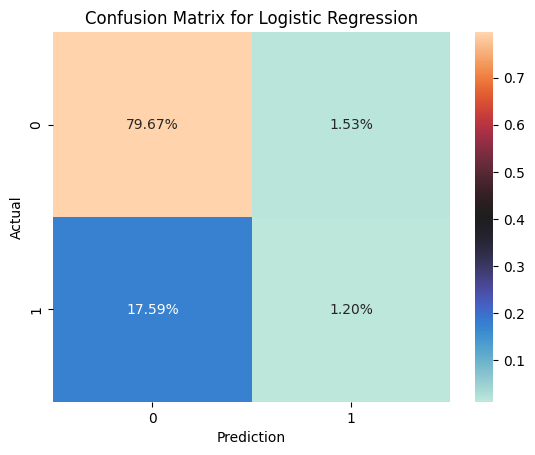

In [59]:
from xgboost import XGBClassifier

# Se crea y entrena el modelo XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

#Se realiza la predicción
y_pred = model.predict(X_test)

reporte(y_test,y_pred)

En su primera aproximación, el modelo XGBoost muestra un desempeño sólido para la clase 0, con un recall del 98.1% y un f1-score de 0.89, indicando una alta capacidad para identificar correctamente los casos negativos.

Para la clase 1, el modelo presenta una baja capacidad de detección, con un recall del 6.4% y un f1-score de 0.11, lo que refleja que solo una pequeña fracción de los casos positivos es reconocida.

La precisión general del modelo es alta (80.9%), pero esta métrica es influenciada por el desbalance de clases y no refleja la dificultad para detectar la clase minoritaria.

En resumen, XGBoost en esta etapa inicial tiene un desempeño similar a los modelos anteriores: fuerte para la clase mayoritaria y muy limitado en la detección de la clase minoritaria.

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores Hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.8}
Mejor F1-score: 0.34845815423833715

--- Resultados con Diferentes Umbrales ---

Umbral: 0.3
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          307        11874
Actual 1           35         2784

Classification Report:
              precision    recall  f1-score       support
0              0.897661  0.025203  0.049030  12181.000000
1              0.189930  0.987584  0.318590   2819.000000
accuracy       0.206067  0.206067  0.206067      0.206067
macro avg      0.543796  0.506394  0.183810  15000.000000
weighted avg   0.764655  0.206067  0.099689  15000.000000


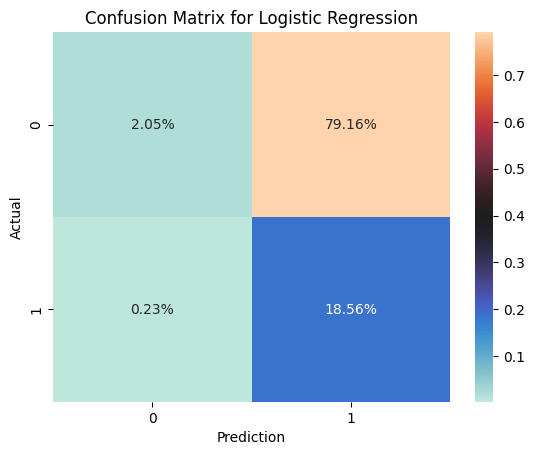


Umbral: 0.4
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1146        11035
Actual 1          103         2716

Classification Report:
              precision    recall  f1-score       support
0              0.917534  0.094081  0.170663  12181.000000
1              0.197513  0.963462  0.327821   2819.000000
accuracy       0.257467  0.257467  0.257467      0.257467
macro avg      0.557523  0.528772  0.249242  15000.000000
weighted avg   0.782218  0.257467  0.200198  15000.000000


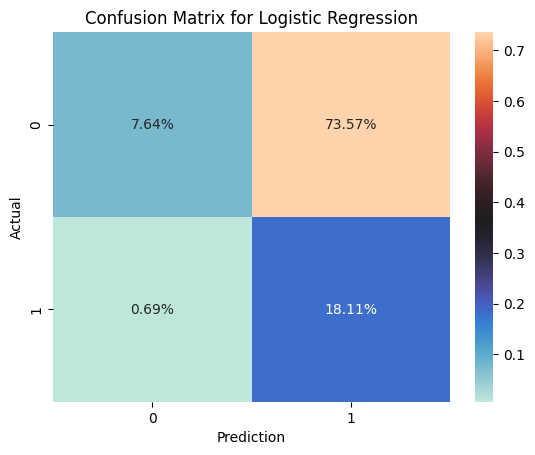


Umbral: 0.5
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         2824         9357
Actual 1          253         2566

Classification Report:
              precision    recall  f1-score       support
0              0.917777  0.231836  0.370166  12181.000000
1              0.215214  0.910252  0.348121   2819.000000
accuracy       0.359333  0.359333  0.359333      0.359333
macro avg      0.566496  0.571044  0.359144  15000.000000
weighted avg   0.785742  0.359333  0.366023  15000.000000


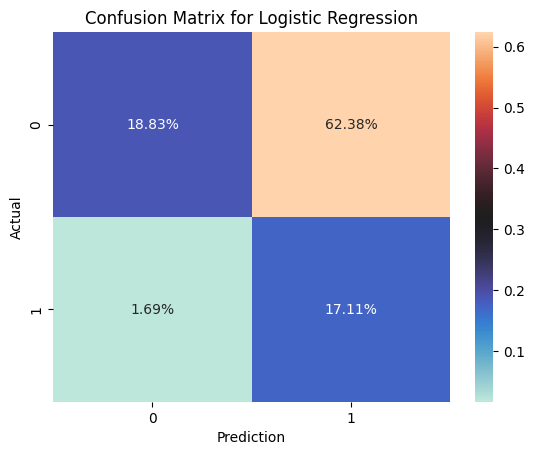


Umbral: 0.6
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         5147         7034
Actual 1          611         2208

Classification Report:
              precision    recall  f1-score       support
0              0.893887  0.422543  0.573834  12181.000000
1              0.238909  0.783256  0.366139   2819.000000
accuracy       0.490333  0.490333  0.490333      0.490333
macro avg      0.566398  0.602900  0.469986  15000.000000
weighted avg   0.770795  0.490333  0.534801  15000.000000


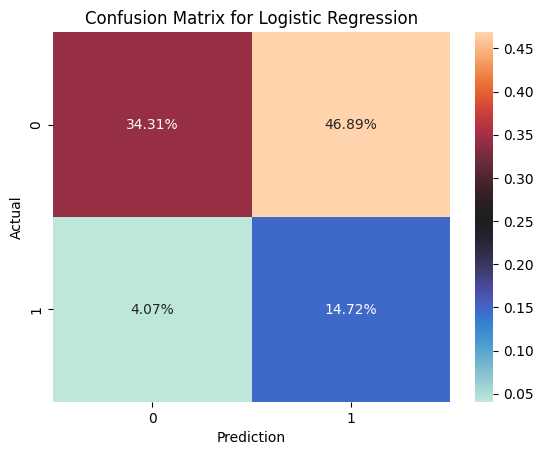


Umbral: 0.7
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         7982         4199
Actual 1         1217         1602

Classification Report:
              precision    recall  f1-score       support
0              0.867703  0.655283  0.746679  12181.000000
1              0.276159  0.568287  0.371694   2819.000000
accuracy       0.638933  0.638933  0.638933      0.638933
macro avg      0.571931  0.611785  0.559186  15000.000000
weighted avg   0.756532  0.638933  0.676207  15000.000000


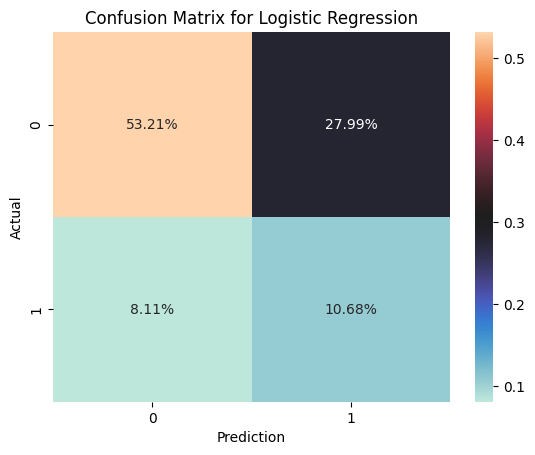

'  \n# 10. Evaluar y Visualizar (CORREGIDO)\nbest_threshold = 0.6  # Elige el mejor umbral según los resultados anteriores\ny_pred_best = (y_proba > best_threshold).astype(int) # Usamos las predicciones con el mejor umbral\n\nprint("\n--- Resultados del Mejor Modelo XGBoost ---")\nprint(classification_report(y_test, y_pred_best))\nprint(confusion_matrix(y_test, y_pred_best))\n\nconf_matrix = confusion_matrix(y_test, y_pred_best)\ncolor = sns.color_palette("icefire", as_cmap=True)\nclass_names = np.unique(y)\nsns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap=color, fmt=\'.2%\',\n            xticklabels=class_names, yticklabels=class_names)\nplt.xlabel(\'Prediction\')\nplt.ylabel(\'Actual\')\nplt.title(f\'Normalized Confusion Matrix for Optimized XGBoost (Threshold={best_threshold})\')\nplt.tight_layout()\nplt.show()'

In [60]:
# Se definen las variables del XGBoost
xgb_model = XGBClassifier(objective='binary:logistic',
                        eval_metric='logloss',  # o 'auc' o 'f1'
                        use_label_encoder=False,  # Necesario en versiones recientes
                        random_state=42)

# Se definen los hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10]  # Ajusta según tu desbalance
}

# Se realiza la validación cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


# Se configura el GridSearch y buscan los mejores hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='f1',
                         n_jobs=-1,
                         verbose=1)
grid_search.fit(X_train, y_train)
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score:", grid_search.best_score_)

# Se entrena al modelo con el mejor grid_search.best_estimator_
best_xgb = grid_search.best_estimator_

# 9. Ajuste del Umbral
y_proba = best_xgb.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 1
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Probamos diferentes umbrales

print("\n--- Resultados con Diferentes Umbrales ---")
for threshold in thresholds:
    y_pred = (y_proba > threshold).astype(int)
    print(f"\nUmbral: {threshold}")
    reporte (y_test,y_pred)

'''
# 10. Evaluar y Visualizar (CORREGIDO)
best_threshold = 0.6  # Elige el mejor umbral según los resultados anteriores
y_pred_best = (y_proba > best_threshold).astype(int) # Usamos las predicciones con el mejor umbral

print("\n--- Resultados del Mejor Modelo XGBoost ---")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

conf_matrix = confusion_matrix(y_test, y_pred_best)
color = sns.color_palette("icefire", as_cmap=True)
class_names = np.unique(y)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap=color, fmt='.2%',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Normalized Confusion Matrix for Optimized XGBoost (Threshold={best_threshold})')
plt.tight_layout()
plt.show()'''

Con la optimización del umbral de decisión, XGBoost muestra un claro compromiso entre la detección de la clase mayoritaria y minoritaria:

* A umbrales bajos (0.3 y 0.4), el modelo prioriza la detección de la clase 1, logrando un recall superior al 96% para esta clase, pero a costa de un recall muy bajo para la clase 0 (2.5% y 9.4%), y por ende, una precisión general y exactitud global muy bajas (20-26%).

* En umbrales intermedios (0.5 y 0.6), el modelo logra un mejor balance, con un recall para clase 1 entre 78% y 91% y un recall para clase 0 entre 23% y 42%, incrementando así la f1-score para ambas clases y la exactitud total (hasta cerca del 49%).

* Con umbral alto (0.7), el modelo recupera mayor precisión para la clase 0 (recall 65.5%) manteniendo un recall razonable para la clase 1 (56.8%), alcanzando un accuracy de 63.9% y f1-scores más equilibrados.

La variación del umbral permite ajustar el modelo entre priorizar la sensibilidad a la clase minoritaria o la precisión general. El umbral 0.7 parece ofrecer un buen equilibrio, mejorando significativamente la detección de la clase minoritaria sin sacrificar demasiado la clase mayoritaria. Esto evidencia la importancia de calibrar el umbral en problemas con clases desbalanceadas para optimizar el trade-off entre falsos positivos y falsos negativos.

## CONCLUSIÓN

En general, todos los modelos evaluados presentan un desafío común: la dificultad para detectar eficazmente la clase minoritaria (clase 1) debido al desbalance en los datos.

Regresión logística y KNN muestran buen desempeño para la clase mayoritaria, pero una capacidad limitada para identificar la clase 1, con bajos recalls y f1-scores para esta última.

Random Forest, especialmente tras ajuste de hiperparámetros, mejora significativamente la detección de la clase 1, aumentando notablemente el recall, aunque a costa de un mayor número de falsos positivos y menor precisión general.

XGBoost, con ajuste del umbral de decisión, ofrece el mayor control sobre el equilibrio entre sensibilidad y especificidad. Al optimizar el umbral, logra un compromiso más efectivo, alcanzando recalls para la clase 1 superiores al fifty por ciento sin sacrificar excesivamente la detección de la clase 0.

Conclusión:
Para predecir la clase 1, el mejor enfoque es utilizar XGBoost con ajuste de umbral, ya que permite maximizar la sensibilidad hacia la clase minoritaria mientras mantiene un rendimiento razonable en la clase mayoritaria. En segundo lugar, Random Forest con hiperparámetros ajustados es una alternativa viable, especialmente si se prioriza la captura de la clase 1 aun con un mayor número de falsos positivos. Regresión logística y KNN pueden ser considerados modelos base o complementarios, pero son menos efectivos para detectar la clase minoritaria en este contexto.